# <center>Curso de Modelagem de Dados para IA - Projeto</center>

<img src="image.jpg" alt="Drawing" style="width: 300px;"/>


## Dataset sobre Pecuária Leiteira

- Descarga: quantos baldes foram enchidos
- Animais organizados em lotes: por produtividade (lote A, B, ....)
- Estes lotes definem se a ordenha é feita duas ou três vezes ao dia
- fd: fluxo da descarga (ml/s)
- td: tempo da descarga (tempo para encher um balde)
- capacidade de 300g(ml) por balde
- PEV Resguardo de 60 dias depois do parto
- IATF: Inserção de hormônio, 11 dias depois há a inseminação e 14 dias depois verifica se ficou prenha

Adicionamos mais 5 colunas no final:
- **tipo**: cor da cabeça
- **ultimo_parto**: data do último parto
- **status**: Gest. (gestante), Ins. (Foi inseminada), Vazia (não está prenha)
- **del**: Dias em lactação (Qtde de dias que se passaram após o parto)
- **quantidade_iatf**: Quantas inseminações essa vaca recebeu
- **dias_iatf**: Há quantos dias foi realizada a inseminação artificial nela

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions
%matplotlib inline

In [2]:
df = pd.read_excel('data/pecuaria/Dados_17_23-01-2022.xlsx', converters={'data': pd.to_datetime})

In [3]:
df.drop(['horario_plan','horario','tempo_espera','diff_horario_plan', 'diff_horario','modulo_diffs','warning'], axis='columns', inplace=True)

In [4]:
print("Tamanho do Rebanho em análise:", len(df['numero'].unique()))

Tamanho do Rebanho em análise: 236


In [5]:
df

,numero,baia,sequencia,descarga,data,peso,media_fluxo_descarga,media_tempo_descarga,periodo,fd_001,...,td_147,td_148,td_149,td_150,tipo,ultimo_parto,status,del,quantidade_iatf,dias_iatf
0,1551,1,1,45,2022-01-17,10.60,59.965371,5.943956,madrugada,0,...,0,0,0,0,NaN,06/05/2021,Ins.,256,4,40
1,1665,1,2,40,2022-01-17,10.60,64.319419,6.274775,madrugada,0,...,0,0,0,0,NaN,16/09/2021,Ins.,123,1,73
2,1662,1,3,56,2022-01-17,11.19,55.448630,5.789821,madrugada,0,...,0,0,0,0,NaN,29/10/2021,Ins.,80,1,4
3,1607,1,4,52,2022-01-17,11.23,52.959644,6.780385,madrugada,0,...,0,0,0,0,NaN,21/10/2021,Ins.,88,1,32
4,1559,1,5,50,2022-01-17,11.45,60.251355,6.456920,madrugada,0,...,0,0,0,0,NaN,24/05/2021,Gest.,238,3,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3524,1441,11,12,28,2022-01-23,7.25,33.440422,10.662929,tarde,0,...,0,0,0,0,NaN,30/04/2021,Gest.,268,2,178
3525,1362,11,13,42,2022-01-23,12.37,50.302262,8.315143,tarde,0,...,0,0,0,0,NaN,07/01/2022,Vazia,16,0,0
3526,1545,11,14,66,2022-01-23,20.66,62.190759,5.945242,tarde,0,...,0,0,0,0,NaN,07/04/2021,Ins.,291,3,10
3527,1509,11,15,43,2022-01-23,12.68,52.812805,8.015907,tarde,0,...,0,0,0,0,NaN,03/09/2021,Ins.,142,3,4


In [6]:
manha = df.index[df['periodo']=='manha'].tolist()
tarde = df.index[df['periodo']=='tarde'].tolist()
for i in manha:
    df.at[i, 'data'] = df['data'][i].replace(hour=6)
for i in tarde:
    df.at[i, 'data'] =  df['data'][i].replace(hour=12)

In [7]:
df

,numero,baia,sequencia,descarga,data,peso,media_fluxo_descarga,media_tempo_descarga,periodo,fd_001,...,td_147,td_148,td_149,td_150,tipo,ultimo_parto,status,del,quantidade_iatf,dias_iatf
0,1551,1,1,45,2022-01-17 00:00:00,10.60,59.965371,5.943956,madrugada,0,...,0,0,0,0,NaN,06/05/2021,Ins.,256,4,40
1,1665,1,2,40,2022-01-17 00:00:00,10.60,64.319419,6.274775,madrugada,0,...,0,0,0,0,NaN,16/09/2021,Ins.,123,1,73
2,1662,1,3,56,2022-01-17 00:00:00,11.19,55.448630,5.789821,madrugada,0,...,0,0,0,0,NaN,29/10/2021,Ins.,80,1,4
3,1607,1,4,52,2022-01-17 00:00:00,11.23,52.959644,6.780385,madrugada,0,...,0,0,0,0,NaN,21/10/2021,Ins.,88,1,32
4,1559,1,5,50,2022-01-17 00:00:00,11.45,60.251355,6.456920,madrugada,0,...,0,0,0,0,NaN,24/05/2021,Gest.,238,3,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3524,1441,11,12,28,2022-01-23 12:00:00,7.25,33.440422,10.662929,tarde,0,...,0,0,0,0,NaN,30/04/2021,Gest.,268,2,178
3525,1362,11,13,42,2022-01-23 12:00:00,12.37,50.302262,8.315143,tarde,0,...,0,0,0,0,NaN,07/01/2022,Vazia,16,0,0
3526,1545,11,14,66,2022-01-23 12:00:00,20.66,62.190759,5.945242,tarde,0,...,0,0,0,0,NaN,07/04/2021,Ins.,291,3,10
3527,1509,11,15,43,2022-01-23 12:00:00,12.68,52.812805,8.015907,tarde,0,...,0,0,0,0,NaN,03/09/2021,Ins.,142,3,4


In [8]:
#df['periodo'].astype('str')
#df['status'].astype('str')

0       madrugada
1       madrugada
2       madrugada
3       madrugada
4       madrugada
          ...    
3524        tarde
3525        tarde
3526        tarde
3527        tarde
3528        tarde
Name: periodo, Length: 3529, dtype: object
0        Ins.
1        Ins.
2        Ins.
3        Ins.
4       Gest.
        ...  
3524    Gest.
3525    Vazia
3526     Ins.
3527     Ins.
3528    Vazia
Name: status, Length: 3529, dtype: object


In [9]:
from sklearn.preprocessing import LabelEncoder

# create label encoder object
le = LabelEncoder()
  
df['periodo']= le.fit_transform(df['periodo'])
df['status']= le.fit_transform(df['status'])

In [10]:
topvacas = df.groupby('numero')['descarga'].median().sort_values(ascending=False).reset_index()

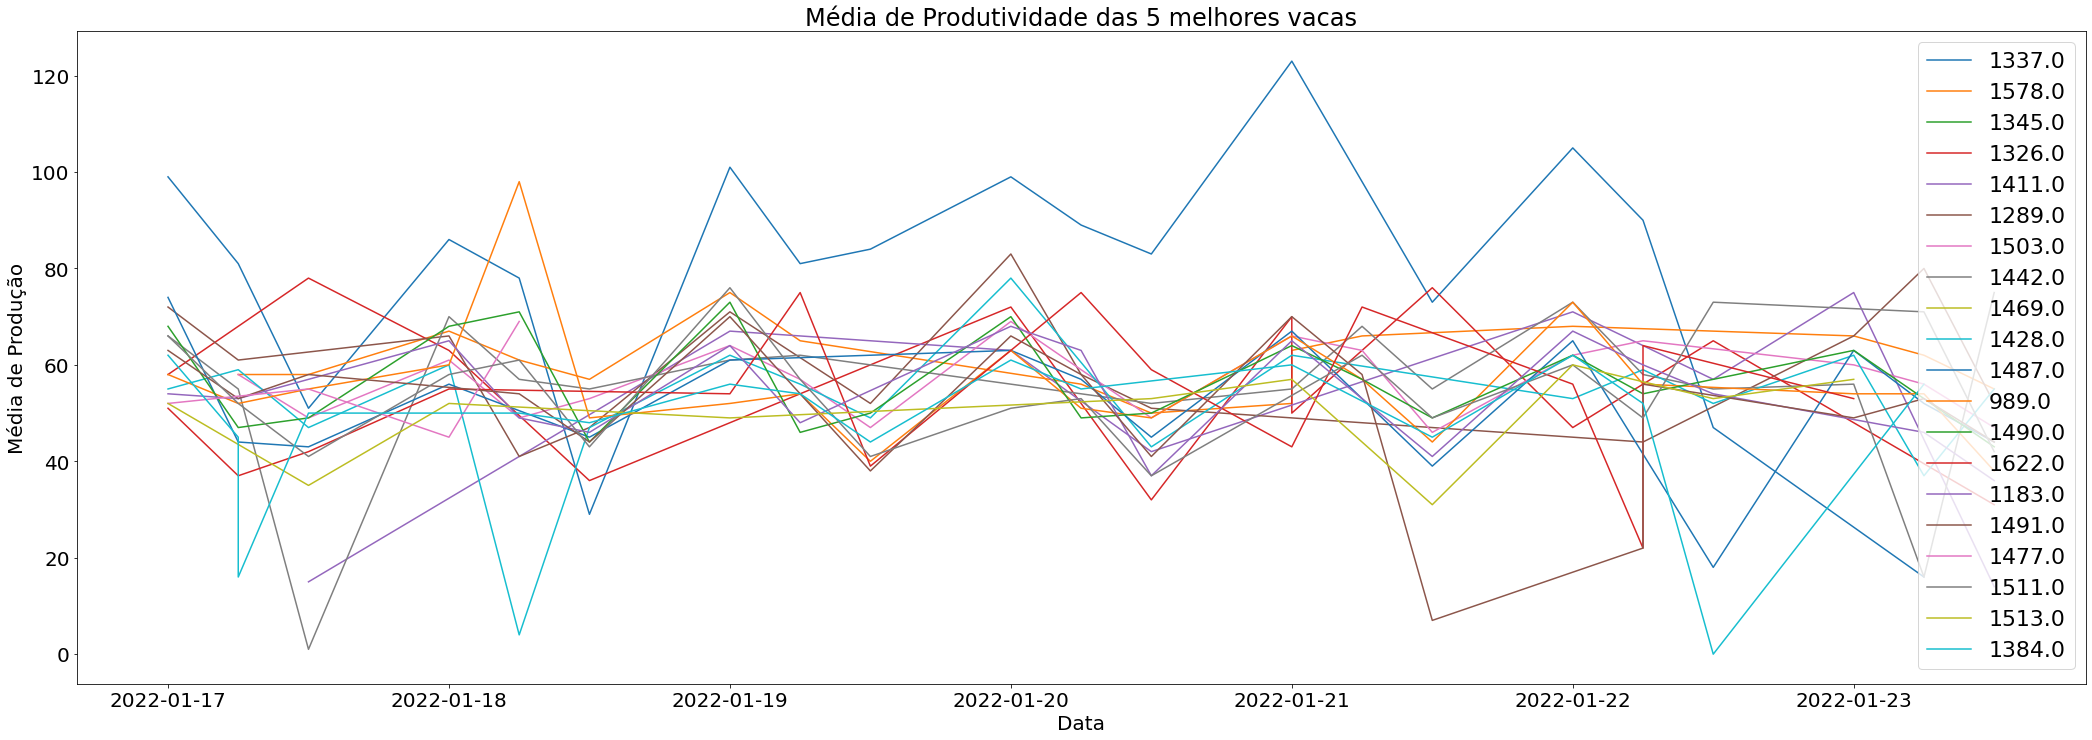

In [51]:
plt.figure(figsize=(36,12))
for top in range(0,20):
    vacaid = topvacas.iloc[top].numero
    melhor = df[df['numero'] == vacaid]
    melhor = melhor.sort_values(by=['data'])
    plt.plot(melhor['data'], melhor['descarga'], label=vacaid)
plt.xlabel('Data', fontsize=20)
plt.ylabel('Média de Produção', fontsize=20)
plt.title('Média de Produtividade das 5 melhores vacas', fontsize=24)
plt.legend(fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

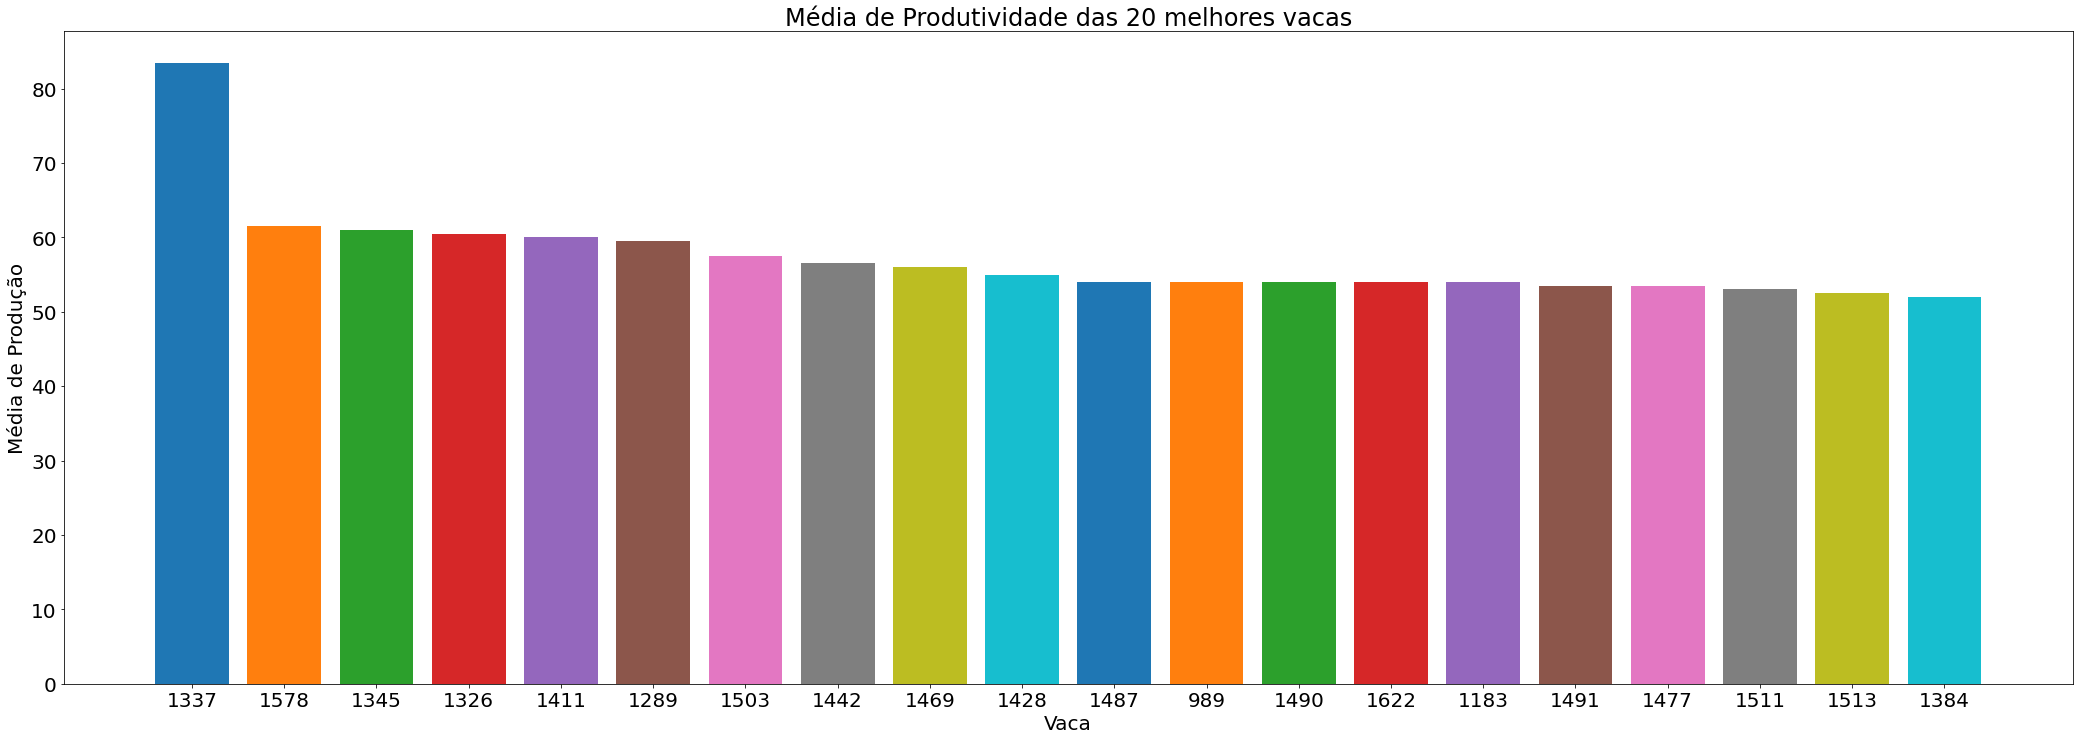

In [12]:
plt.figure(figsize=(36,12))
for top in range(0,20):
    vacaid = topvacas.iloc[top].numero
    melhor = df[df['numero'] == vacaid]
    plt.bar(melhor['numero'].apply(str), melhor['descarga'].median(), label=vacaid)
plt.xlabel('Vaca', fontsize=20)
plt.ylabel('Média de Produção', fontsize=20)
plt.title('Média de Produtividade das 20 melhores vacas', fontsize=24)
#plt.legend(fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


In [13]:
topbaias = df.groupby('baia')['descarga'].median().sort_values(ascending=False).reset_index()

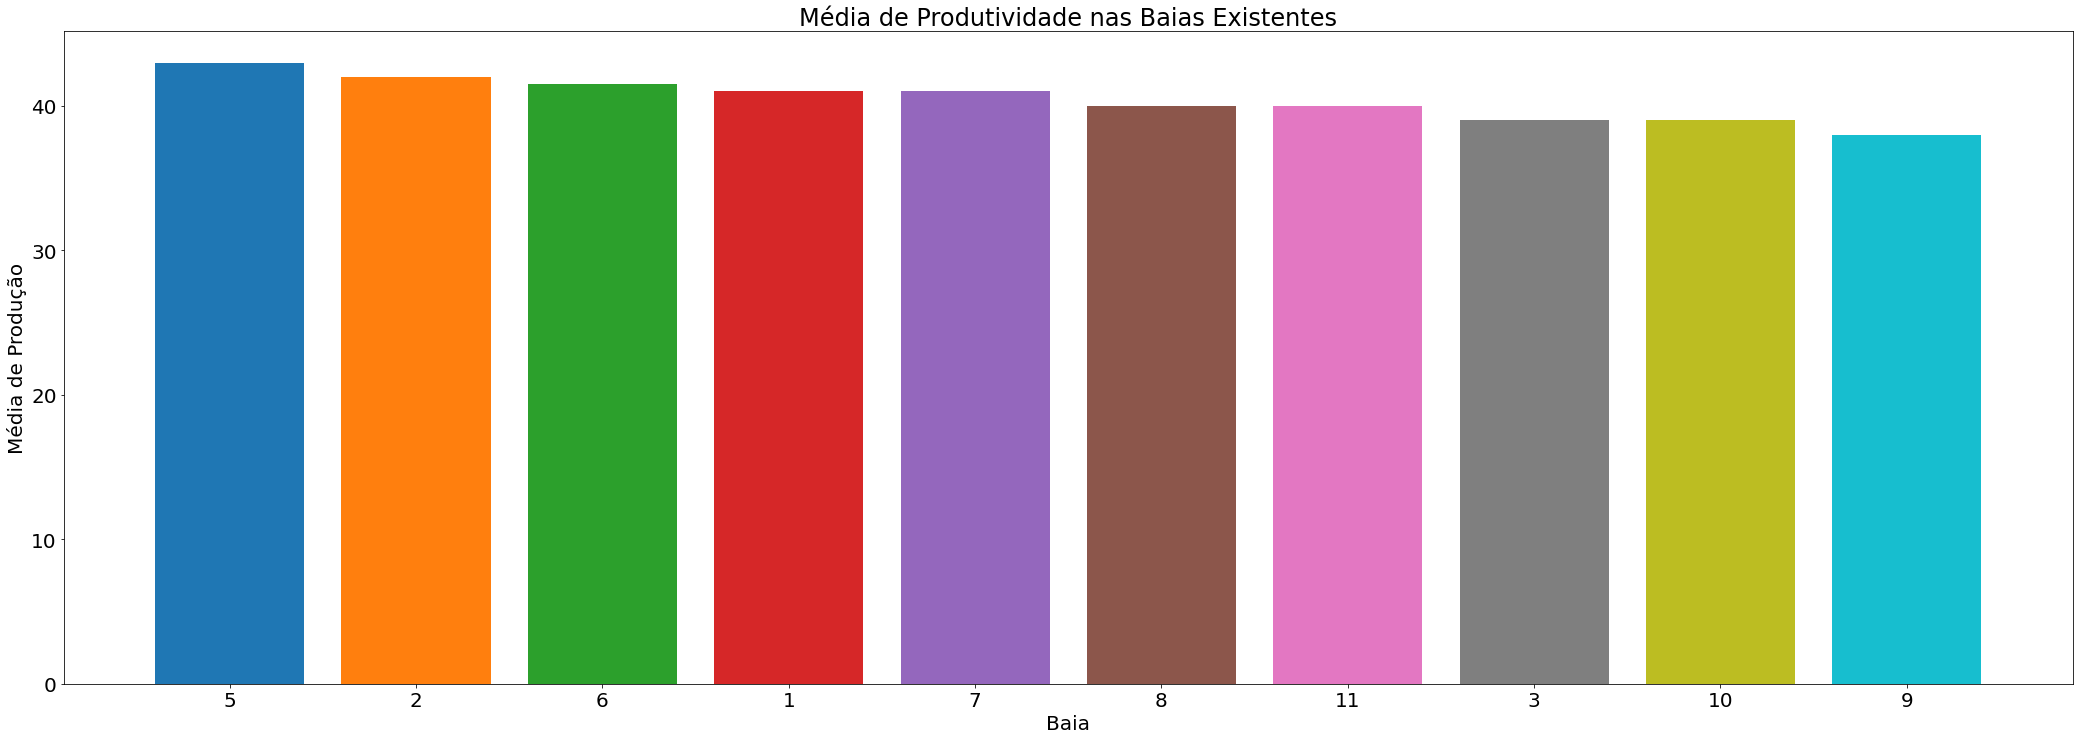

In [14]:
plt.figure(figsize=(36,12))
for top in range(0,10):
    baiaid = topbaias.iloc[top].baia
    melhor = df[df['baia'] == baiaid]
    plt.bar(melhor['baia'].apply(str), melhor['descarga'].median(), label=baiaid)

plt.xlabel('Baia', fontsize=20)
plt.ylabel('Média de Produção', fontsize=20)
plt.title('Média de Produtividade nas Baias Existentes', fontsize=24)
#plt.legend(fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [15]:
#startcol = df.columns.get_loc('fd_002')
#array = df.iloc[:,startcol:159].values
#scaler = Normalizer().fit(array)
#normalizedX = scaler.transform(array)
#col = 0
#for item in df.iloc[:,startcol:159]:
#    print(df[item])
#    df[item] = normalizedX[:,col]
#    col += 1
#    print(df[item])

<Figure size 2592x864 with 0 Axes>

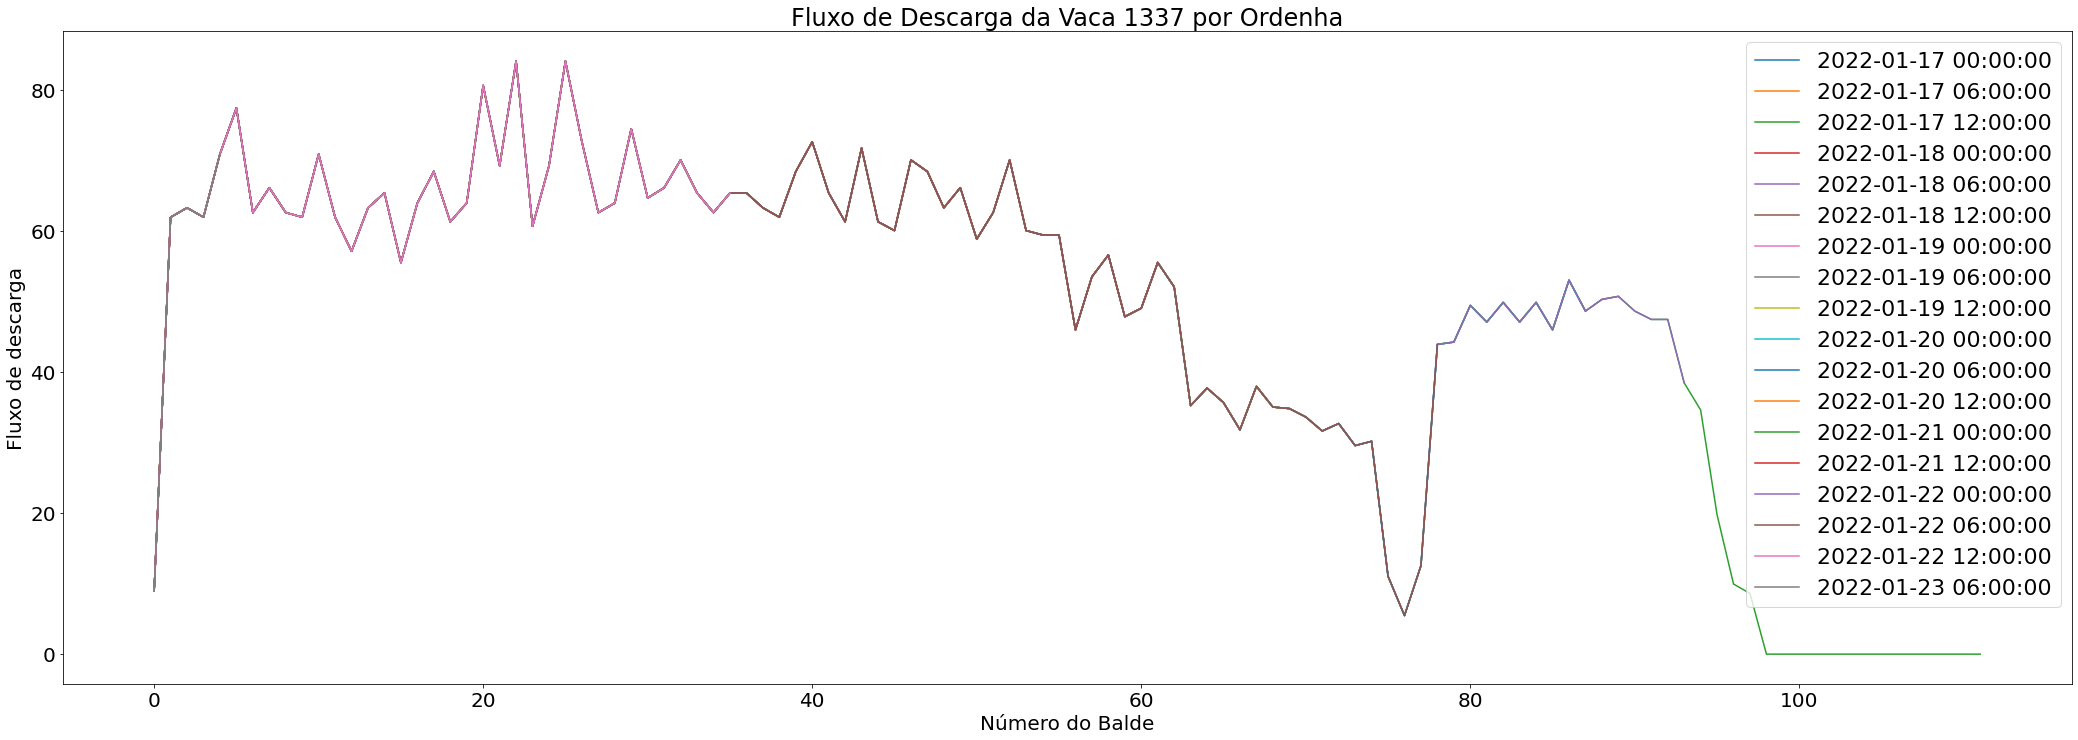

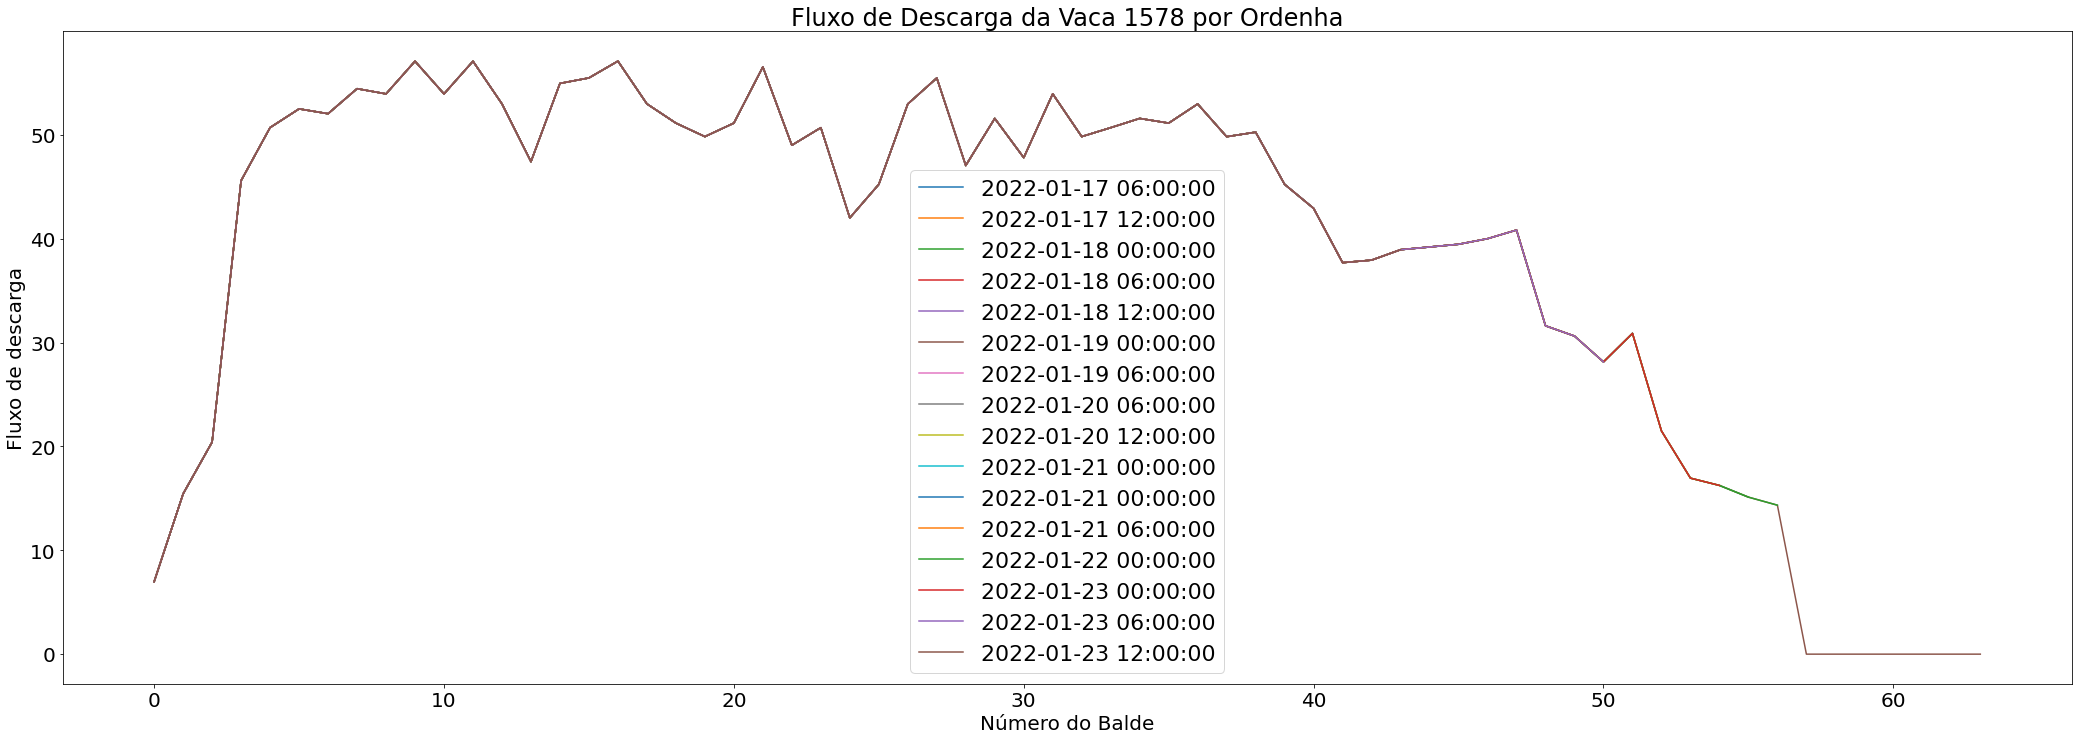

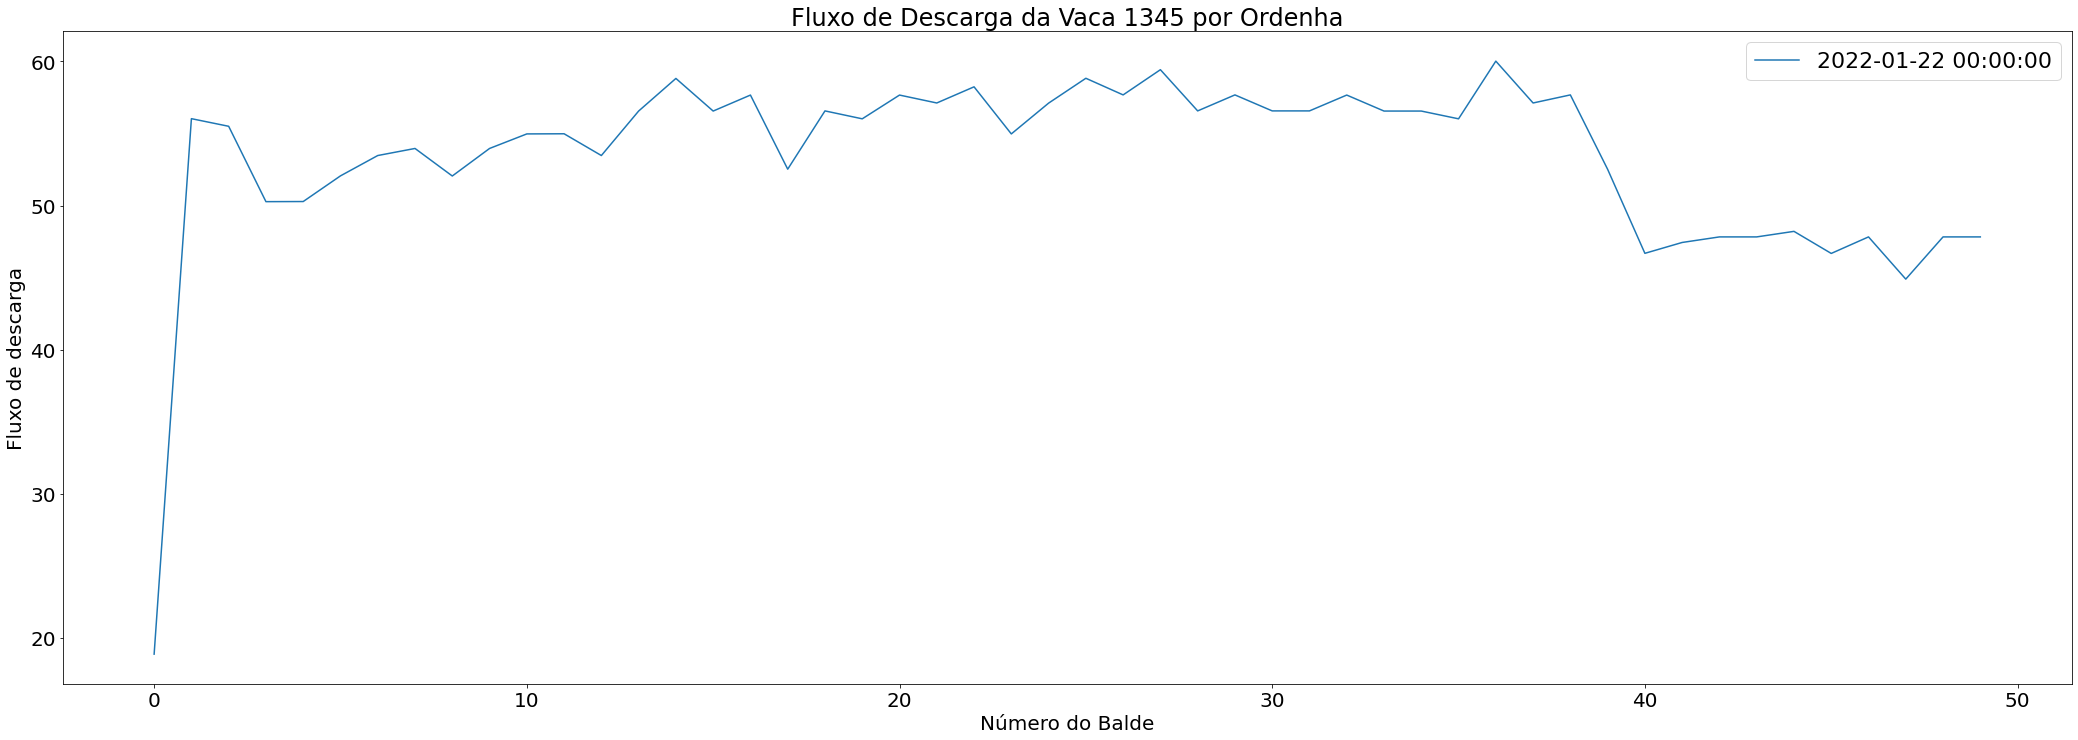

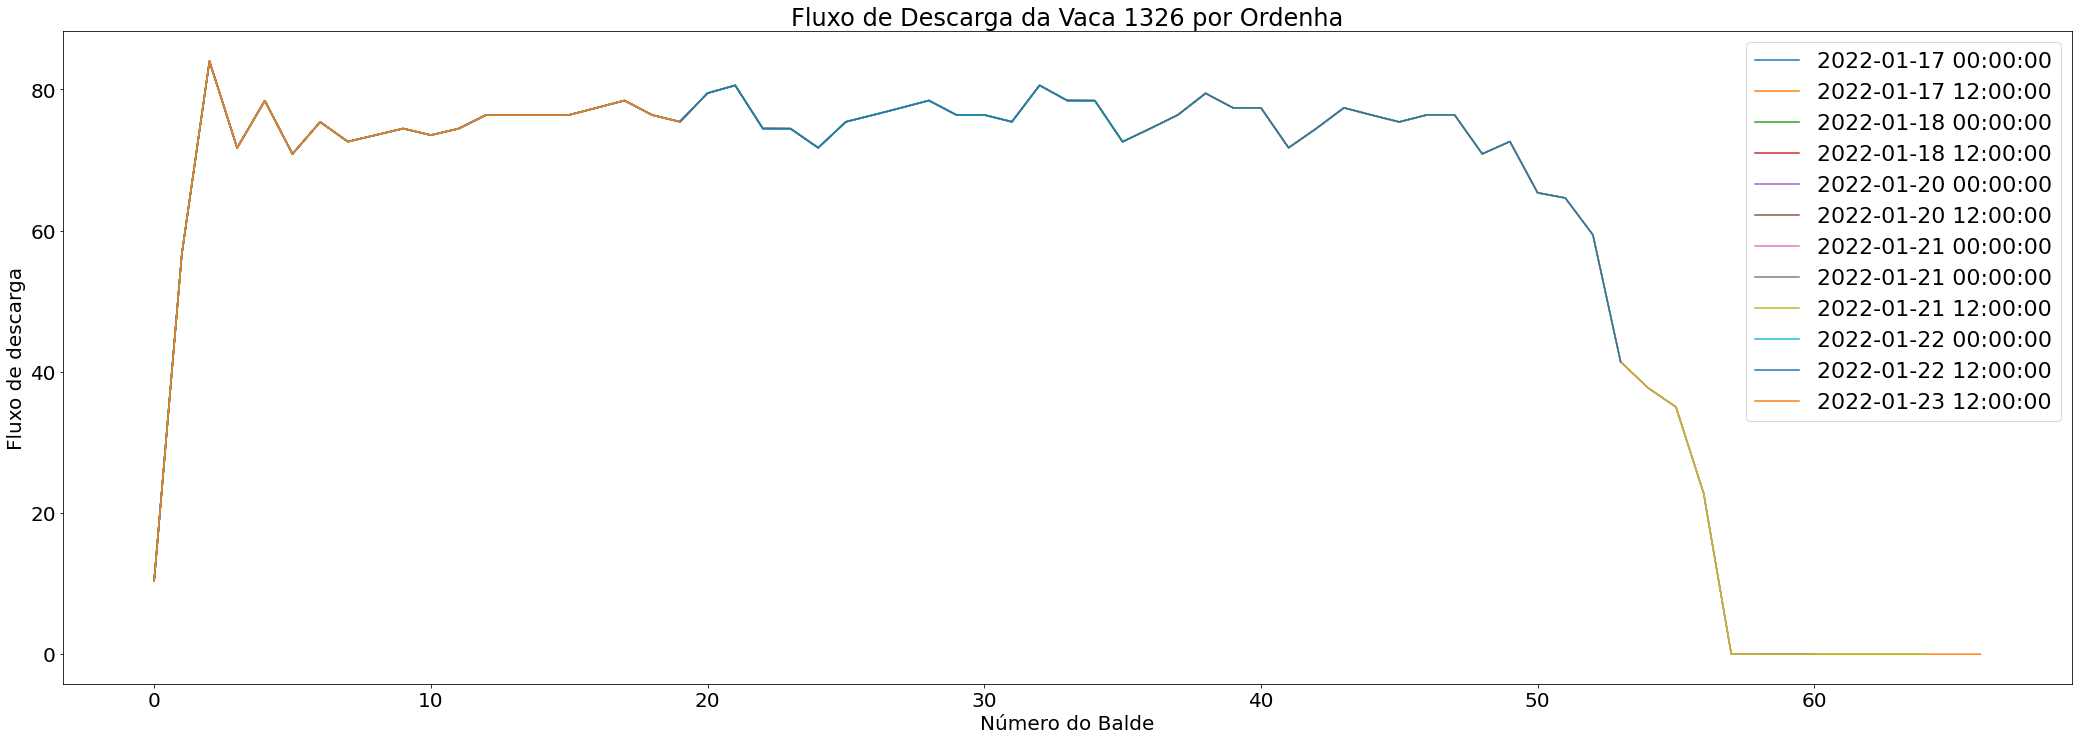

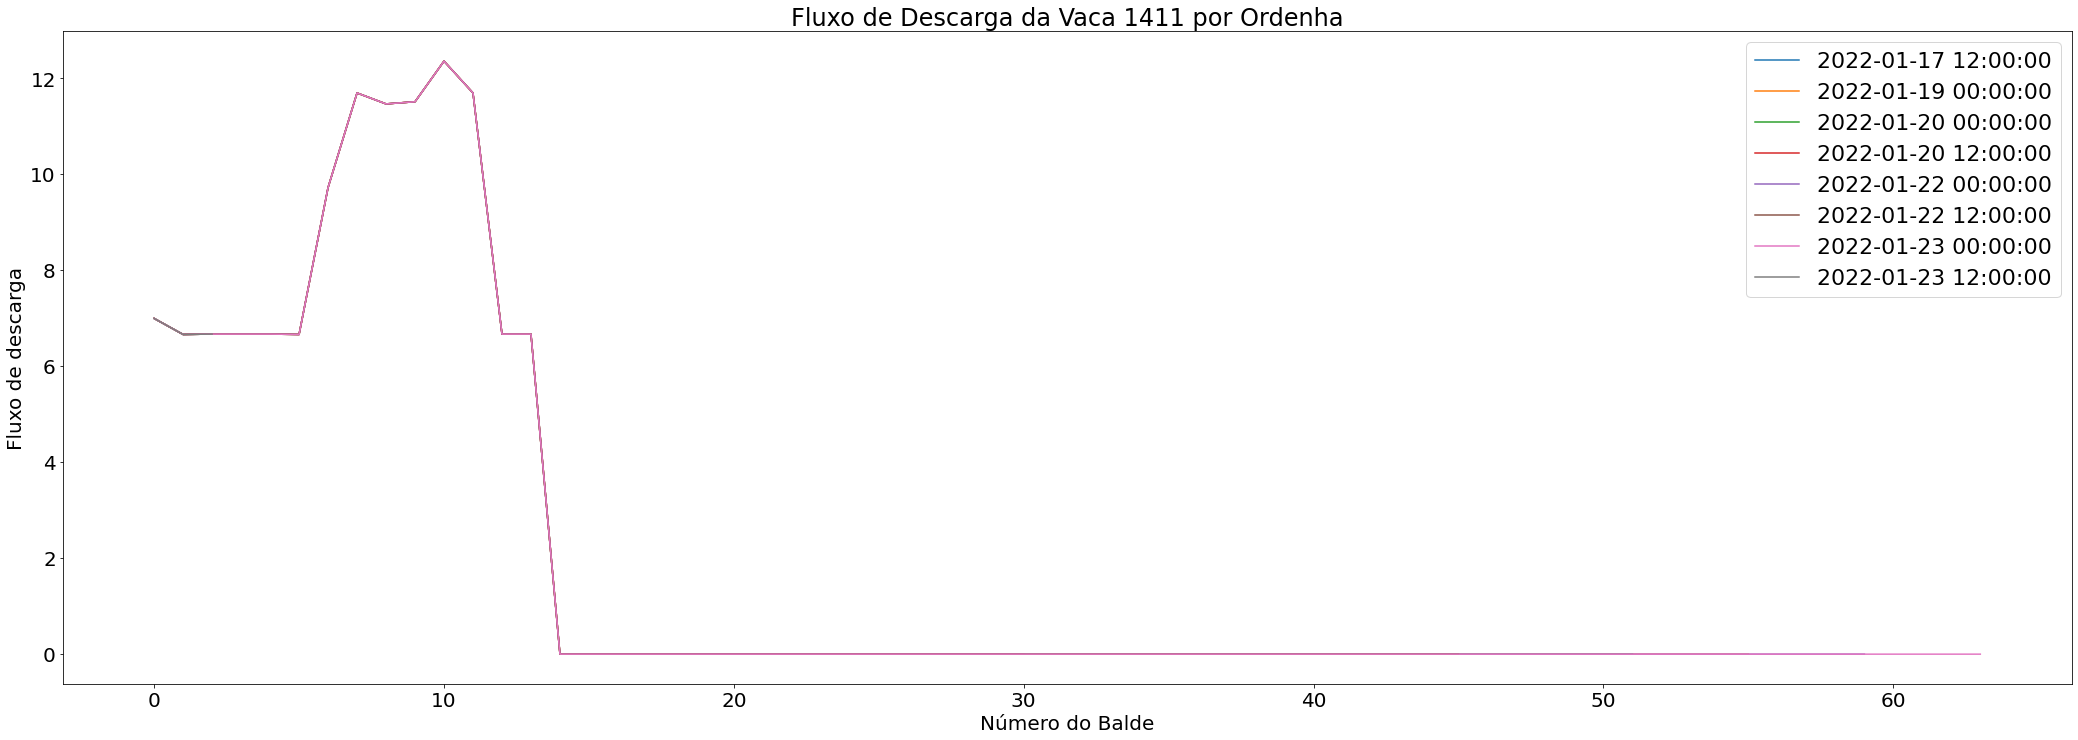

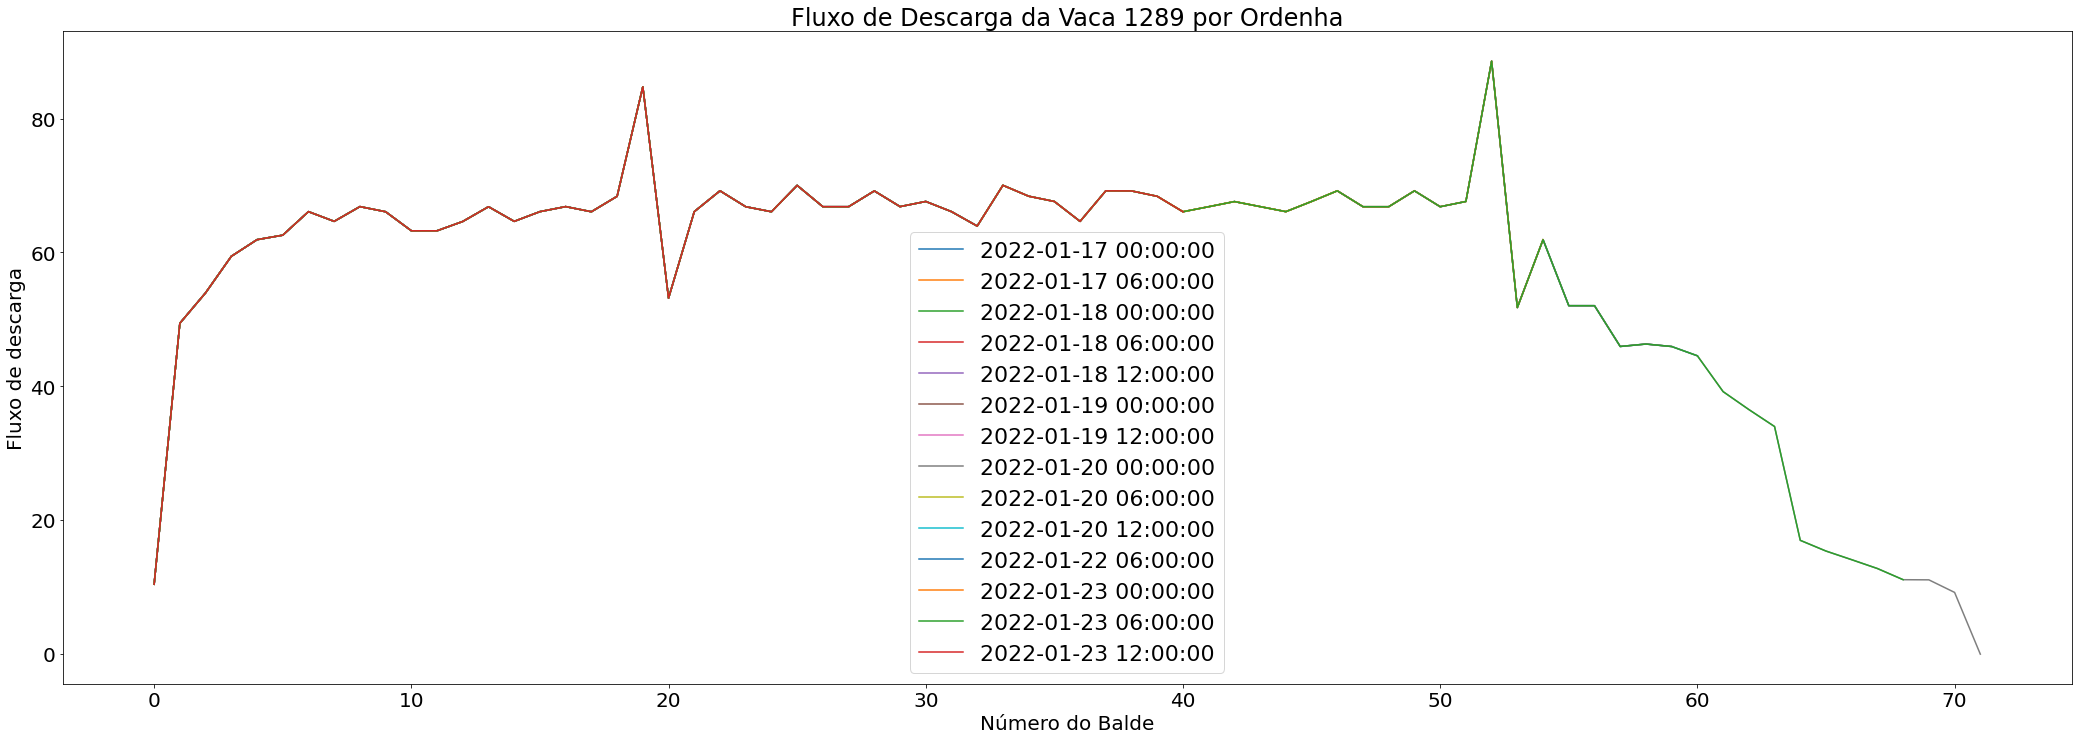

In [16]:
startcol = df.columns.get_loc('fd_002')
plt.figure(figsize=(36,12))
for top in range(0,6):
    vacaid = int(topvacas.iloc[top].numero)
    melhor = df[df['numero'] == vacaid]
    melhor = melhor.sort_values(by=['data']).reset_index()
    #melhor = melhor[melhor['periodo'] == 'madrugada']
    plt.figure(figsize=(36,12))
    for item, data in zip(melhor['descarga'], melhor['data']):
        x = [i for i in range(item-startcol-1)]
        y = melhor.iloc[0,startcol+1:item]
        plt.plot(x, y, label=data)
        plt.xlabel('Número do Balde', fontsize=20)
        plt.ylabel('Fluxo de descarga', fontsize=20)
        plt.title('Fluxo de Descarga da Vaca '+str(vacaid)+' por Ordenha', fontsize=24)
    plt.legend(fontsize=22)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

148


<Figure size 2592x864 with 0 Axes>

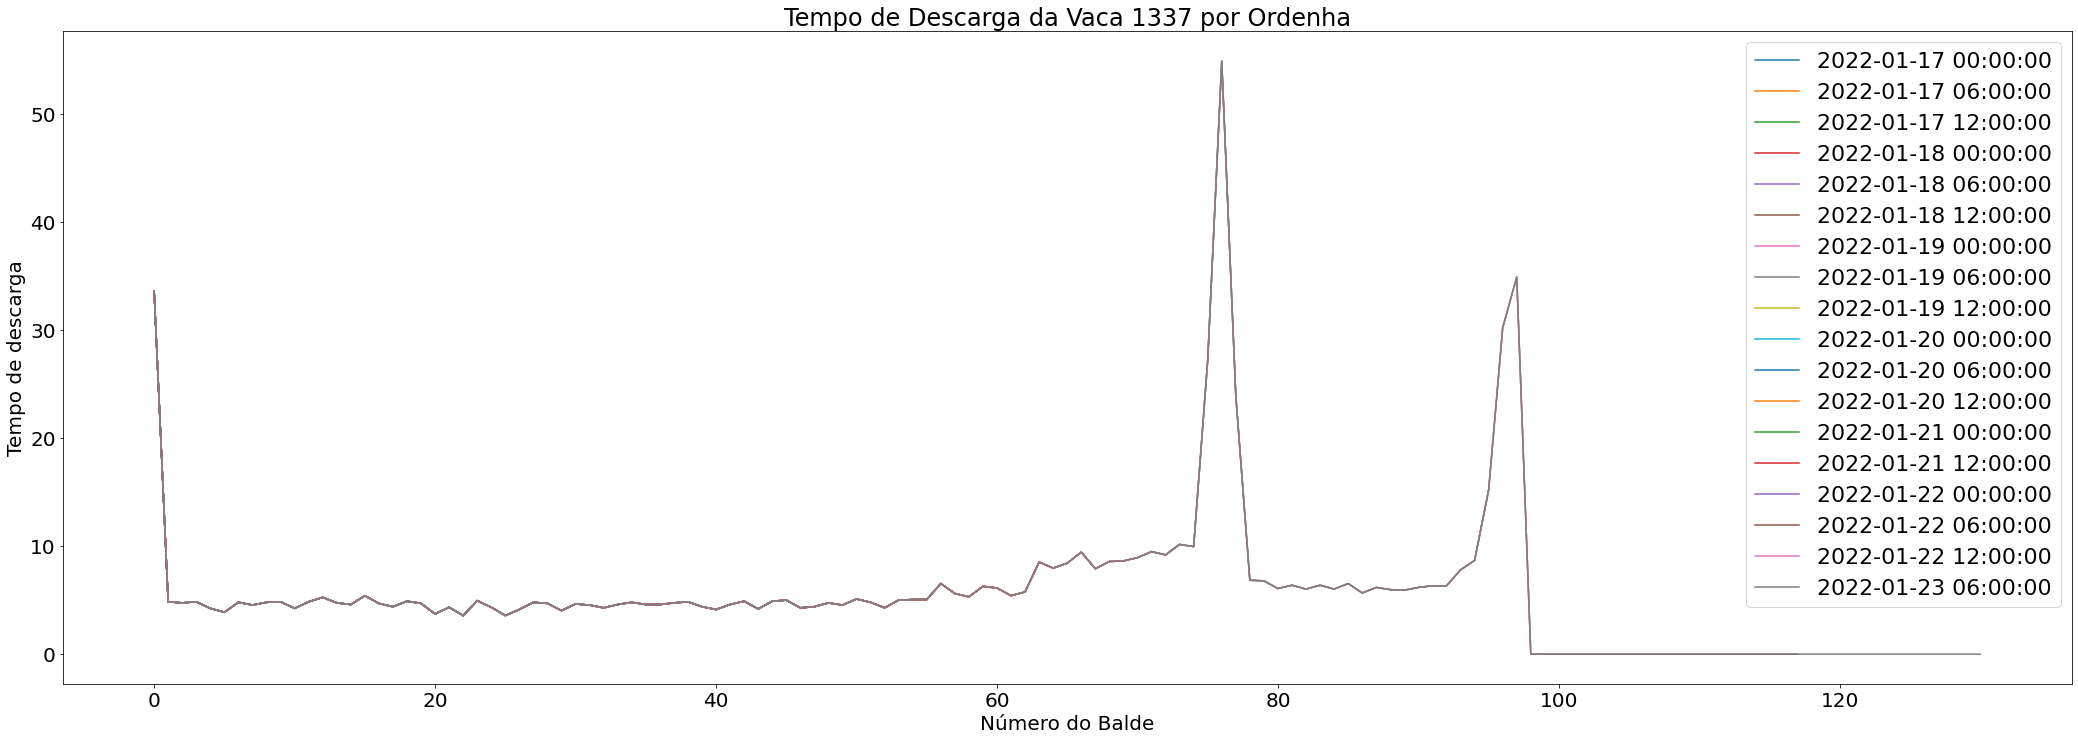

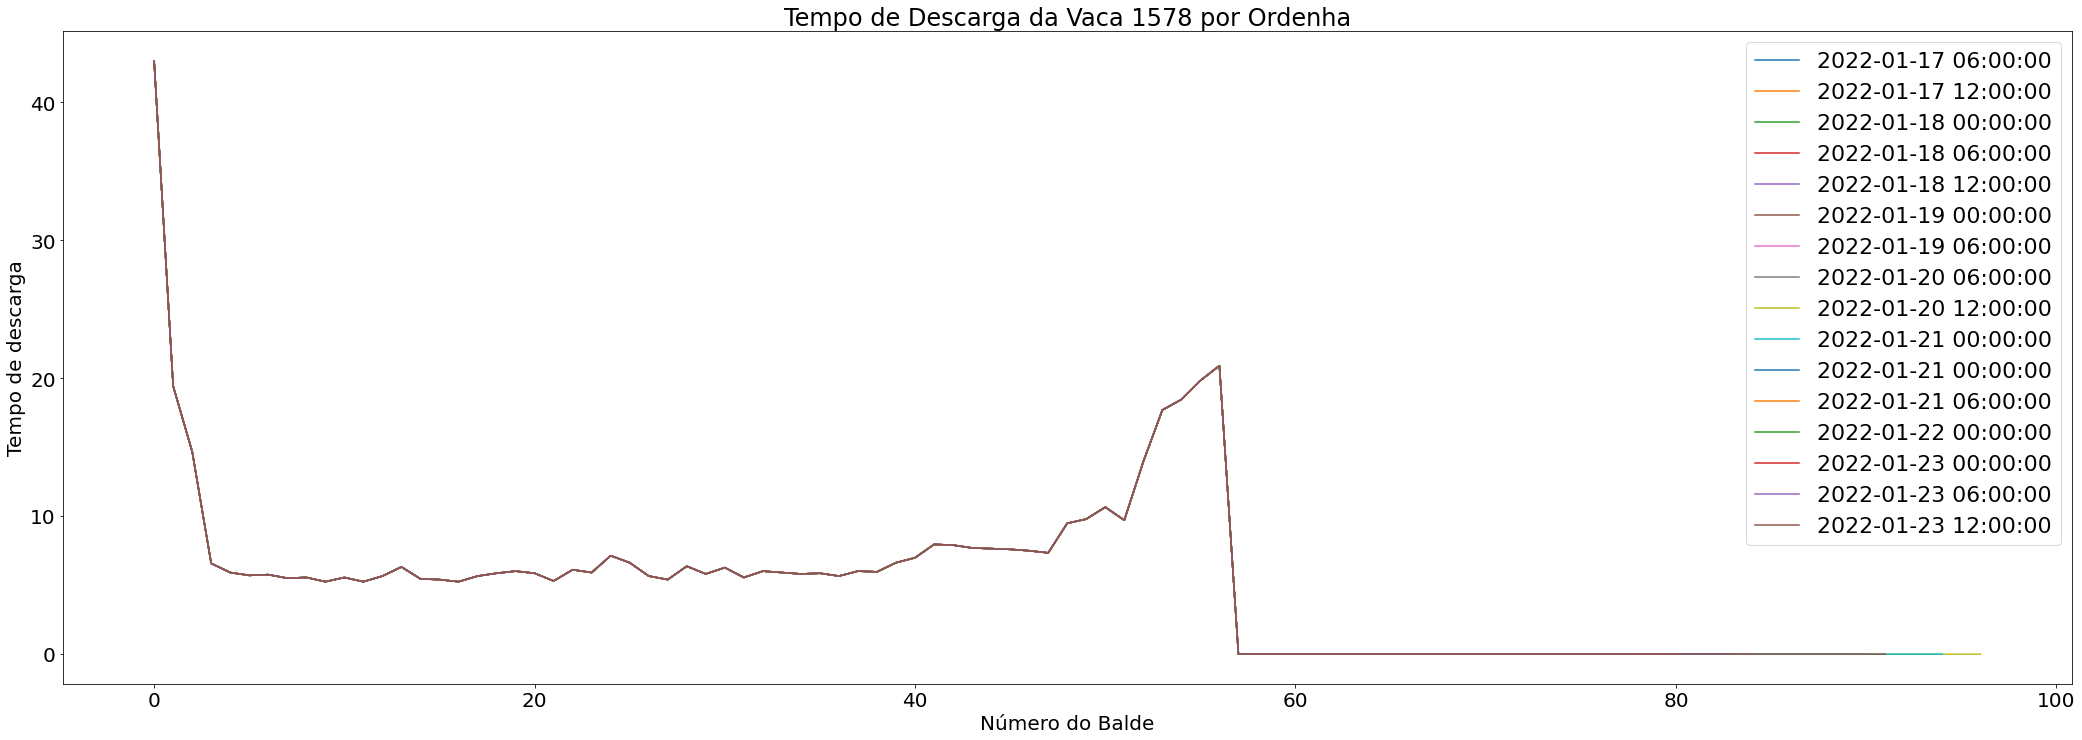

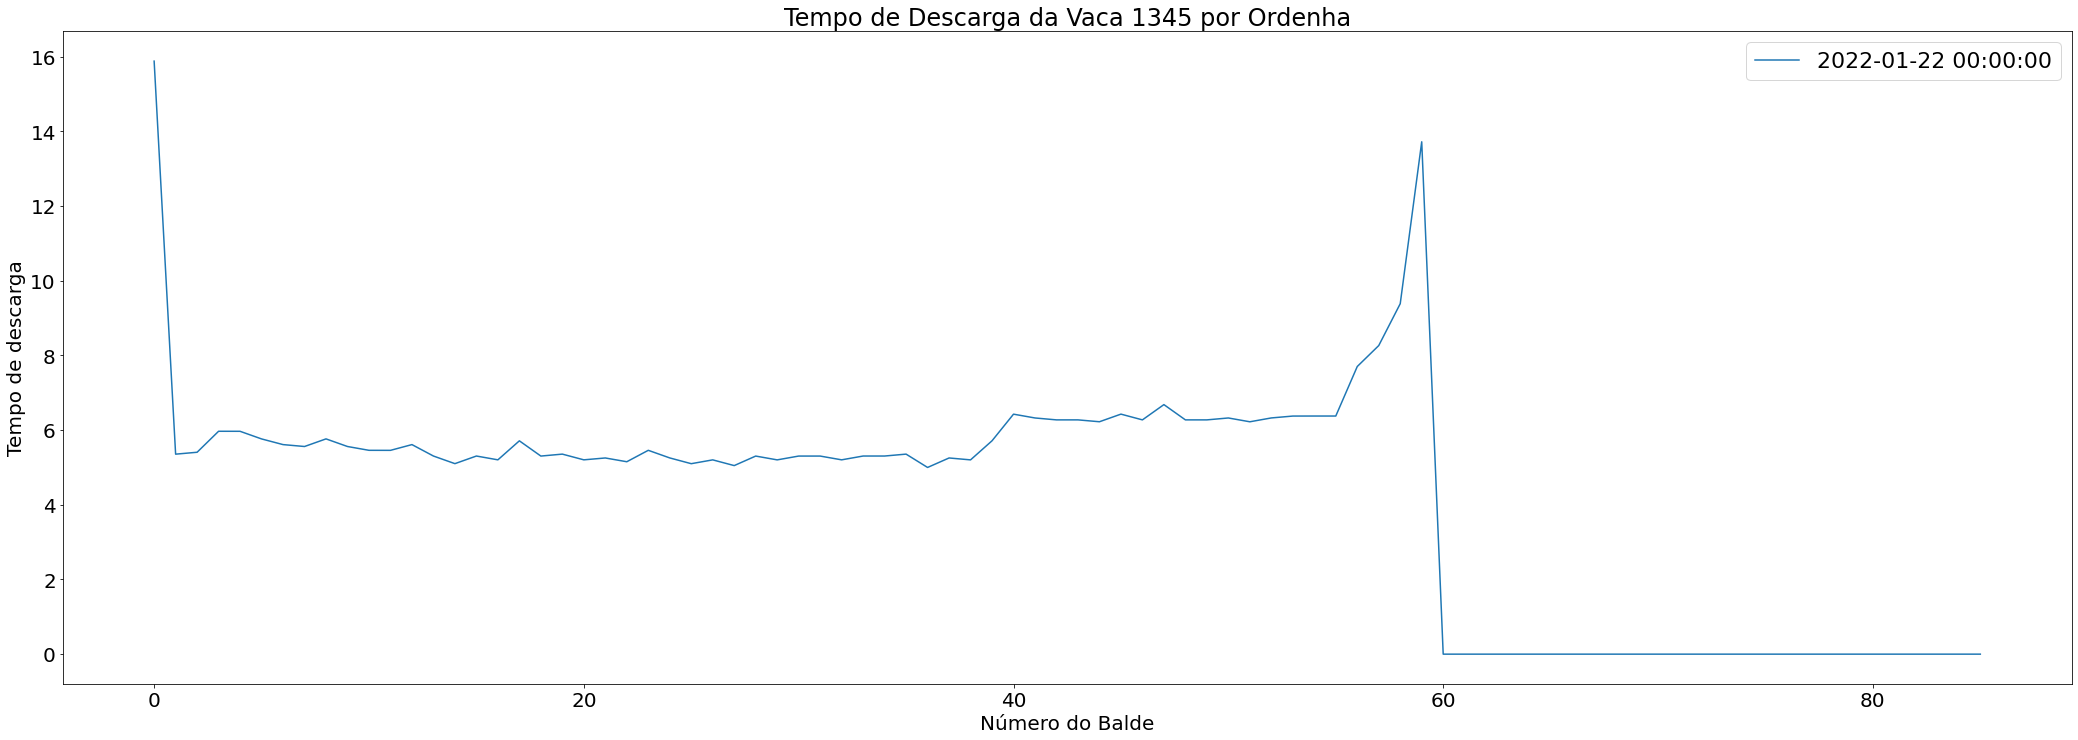

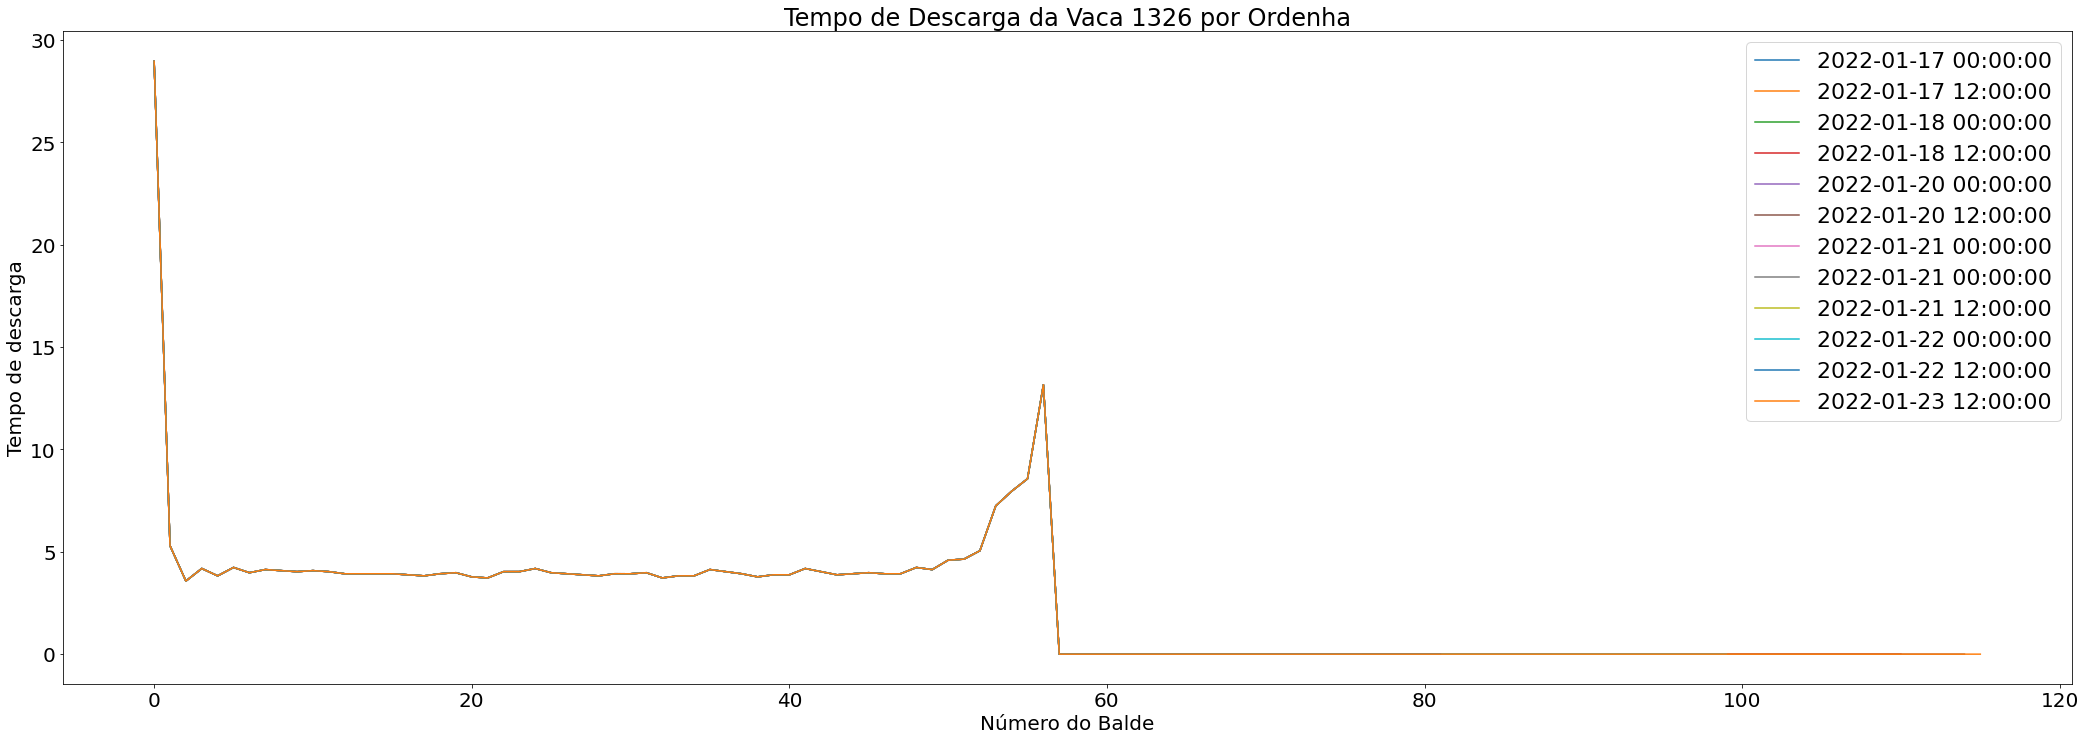

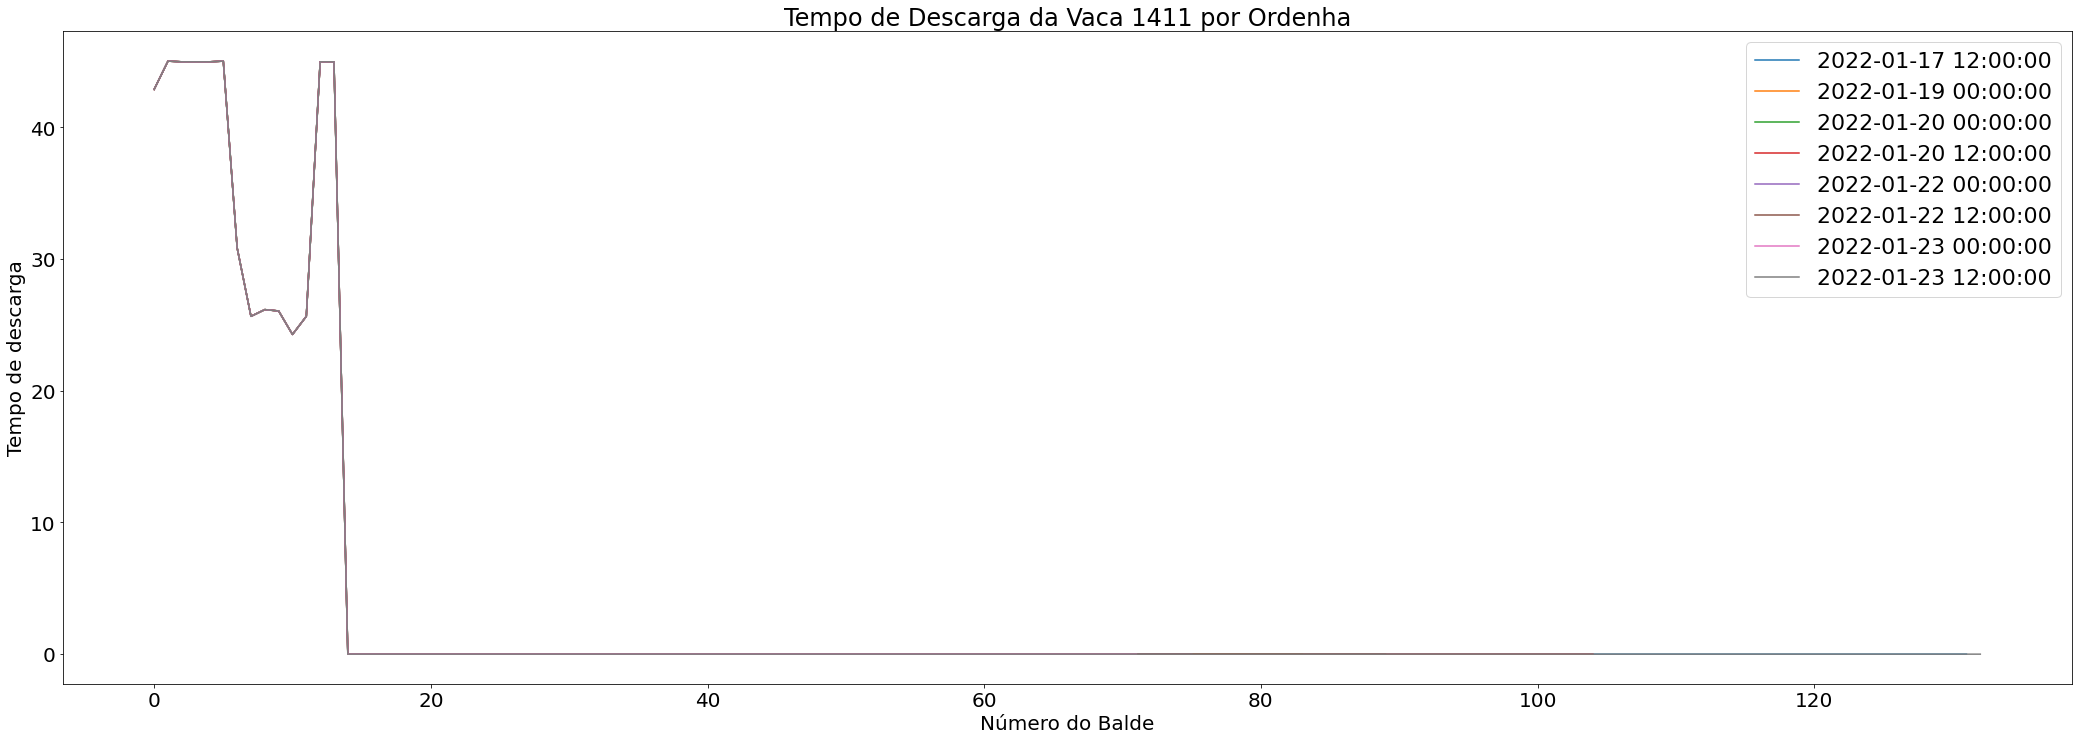

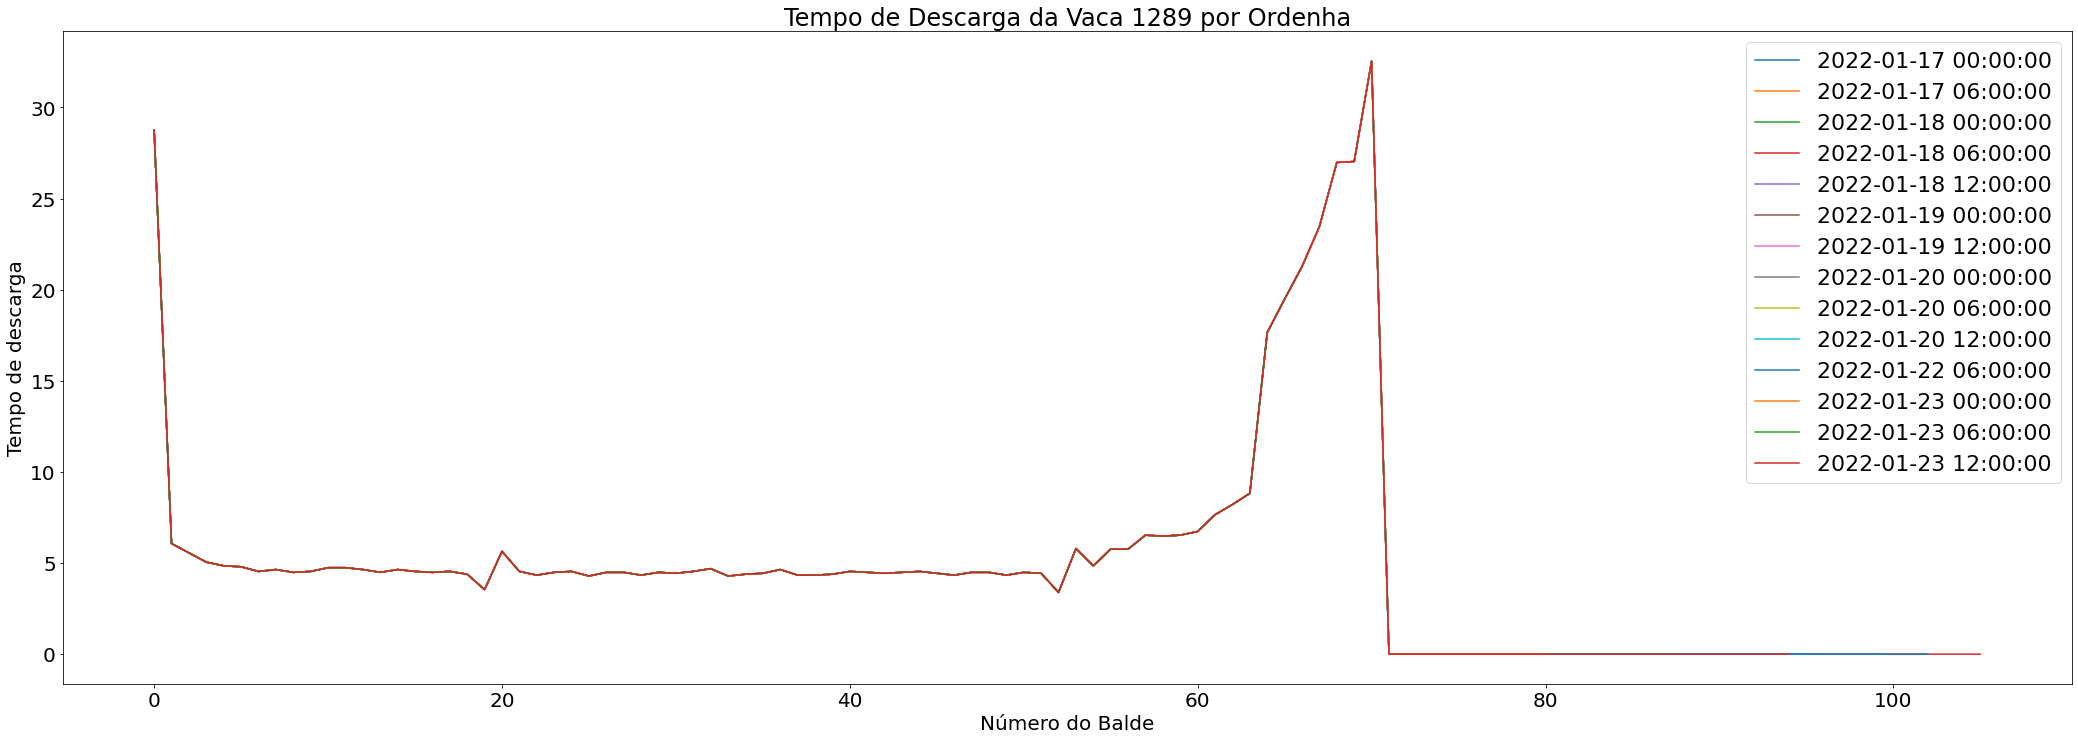

In [17]:
startcol = df.columns.get_loc('td_002')
endcol = df.columns.get_loc('td_150')
print(endcol-startcol)
plt.figure(figsize=(36,12))
for top in range(0,6):
    vacaid = int(topvacas.iloc[top].numero)
    melhor = df[df['numero'] == vacaid]
    melhor = melhor.sort_values(by=['data']).reset_index()
    #melhor = melhor[melhor['periodo'] == 'madrugada']
    plt.figure(figsize=(36,12))
    for item, data in zip(melhor['descarga'], melhor['data']):
        x = [i for i in range(endcol-startcol-1-item)]
        y = melhor.iloc[0,startcol+1:endcol-item]
        plt.plot(x, y, label=data)
        plt.xlabel('Número do Balde', fontsize=20)
        plt.ylabel('Tempo de descarga', fontsize=20)
        plt.title('Tempo de Descarga da Vaca '+str(vacaid)+' por Ordenha', fontsize=24)
    plt.legend(fontsize=22)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

In [18]:
df['status'].replace(['Ins.', 'Gest.', 'Vazia'],[0, 1, 2], inplace=True)
print(df['status'])

0       1
1       1
2       1
3       1
4       0
       ..
3524    0
3525    3
3526    1
3527    1
3528    3
Name: status, Length: 3529, dtype: int64


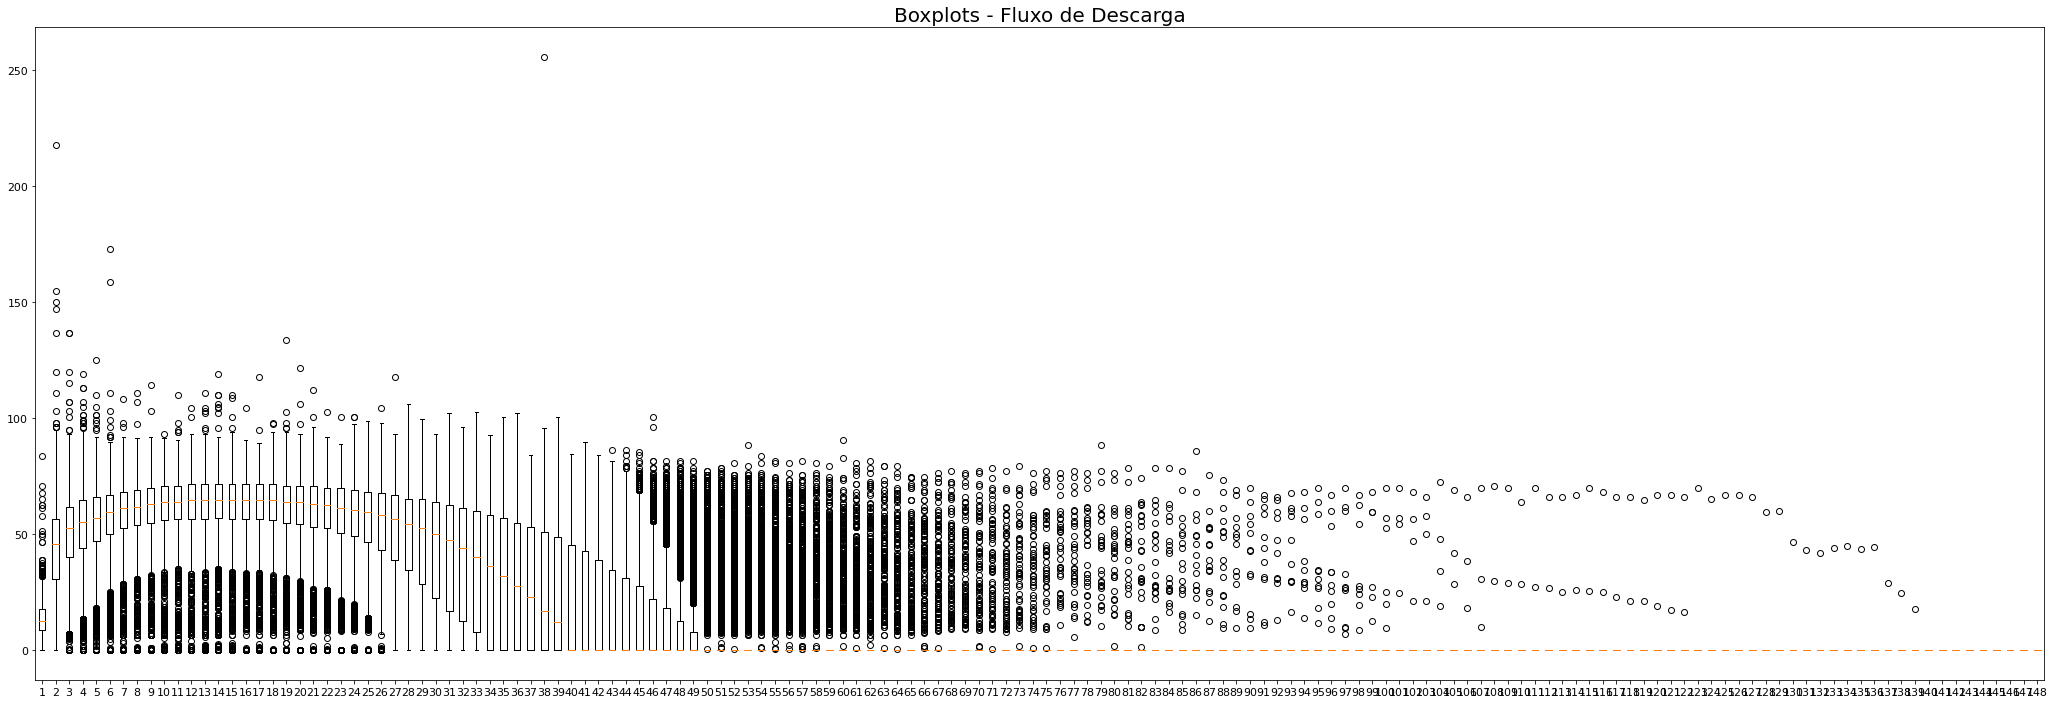

In [19]:
lmin = df.columns.get_loc('fd_002')
lmax = df.columns.get_loc('fd_150')
x = df.iloc[:,lmin:lmax]
#x.drop('revisao',axis='columns', inplace=True)
data = x.astype(float)
plt.rcParams['font.size'] = '11'
fig, ax = plt.subplots(figsize=(36,12))
ax.set_title('Boxplots - Fluxo de Descarga',fontsize=20)
ax.boxplot(data)
plt.show()

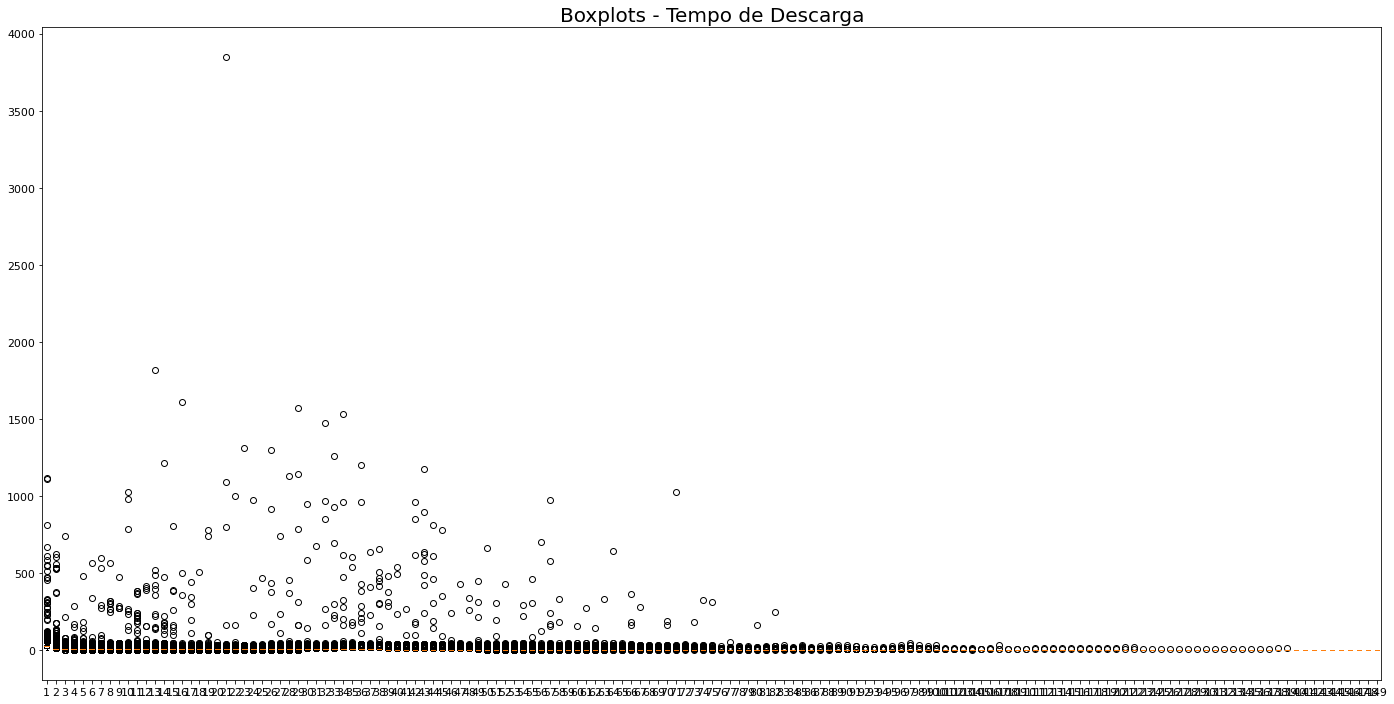

In [20]:
lmin = df.columns.get_loc('td_002')
lmax = df.columns.get_loc('td_150')+1
x = df.iloc[:,lmin:lmax]
#x.drop('revisao',axis='columns', inplace=True)
data = x.astype(float)
plt.rcParams['font.size'] = '11'
fig, ax = plt.subplots(figsize=(24,12))
ax.set_title('Boxplots - Tempo de Descarga',fontsize=20)
ax.boxplot(data)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='media_fluxo_descarga', ylabel='Density'>

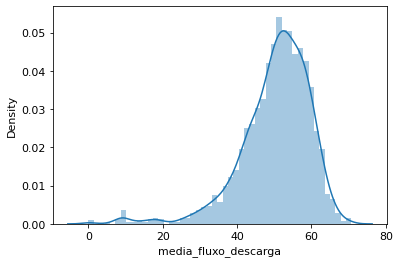

In [21]:
sns.distplot(df['media_fluxo_descarga'])

<AxesSubplot:>

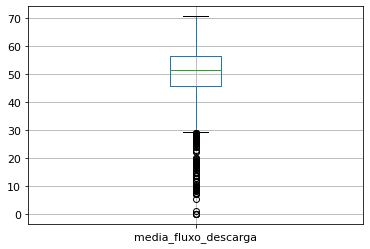

In [22]:
df.boxplot('media_fluxo_descarga')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='media_tempo_descarga', ylabel='Density'>

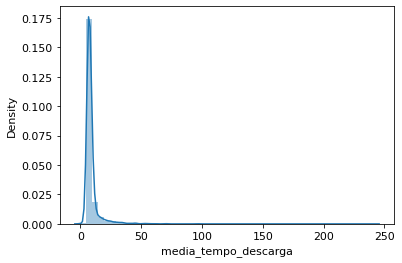

In [23]:
sns.distplot(df['media_tempo_descarga'])

<AxesSubplot:>

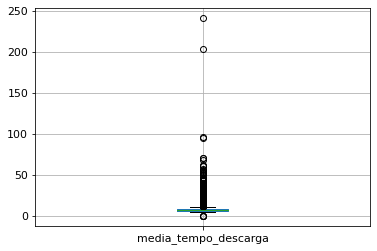

In [24]:
df.boxplot('media_tempo_descarga')

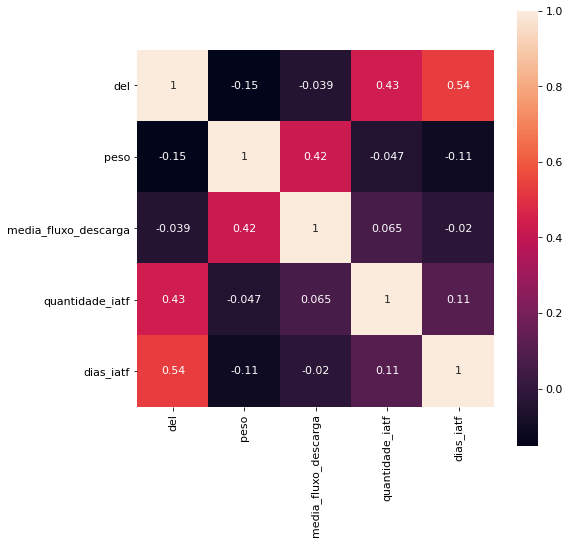

In [25]:
plt.figure(figsize=(8,8))
corr = df[['del','peso', 'media_fluxo_descarga', 'quantidade_iatf', 'dias_iatf']].corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

<AxesSubplot:>

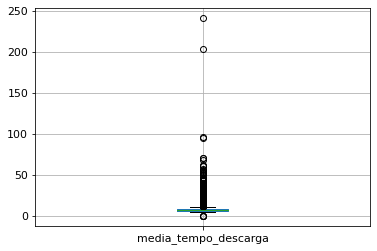

In [26]:
df.boxplot('media_tempo_descarga')

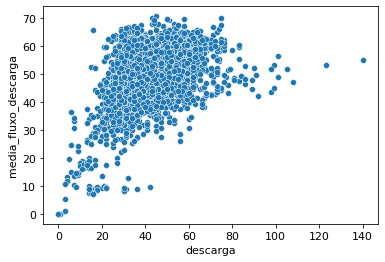

In [27]:
sns.scatterplot(data = df, x = "descarga", y = "media_fluxo_descarga")
plt.show()

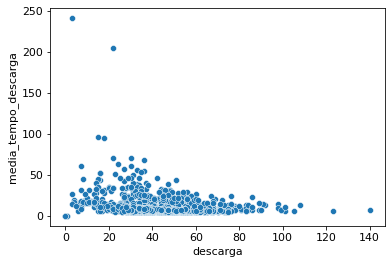

In [28]:
sns.scatterplot(data = df, x = "descarga", y = "media_tempo_descarga")
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numerics)
df_numeric = df_numeric.drop(labels=['numero', 'baia', 'sequencia'], axis=1)
#startcol = df_numeric.columns.get_loc('fd_001')
#endcol = df_numeric.columns.get_loc('td_150')
#array = df_numeric.drop(df_numeric.iloc[:, startcol:endcol+1], axis=1)
array = df_numeric
X = array.values
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
X = scaled_features

In [30]:
df_numeric

,descarga,peso,media_fluxo_descarga,media_tempo_descarga,periodo,fd_001,fd_002,fd_003,fd_004,fd_005,...,td_145,td_146,td_147,td_148,td_149,td_150,status,del,quantidade_iatf,dias_iatf
0,45,10.60,59.965371,5.943956,0,0,9.902297,58.823529,75.414781,70.028011,...,0,0,0,0,0,0,1,256,4,40
1,40,10.60,64.319419,6.274775,0,0,13.646909,55.483632,60.630558,70.011669,...,0,0,0,0,0,0,1,123,1,73
2,56,11.19,55.448630,5.789821,0,0,7.992114,44.221698,45.599635,45.242045,...,0,0,0,0,0,0,1,80,1,4
3,52,11.23,52.959644,6.780385,0,0,7.608999,51.581843,56.001493,55.493896,...,0,0,0,0,0,0,1,88,1,32
4,50,11.45,60.251355,6.456920,0,0,11.311364,49.019608,61.906727,70.871722,...,0,0,0,0,0,0,0,238,3,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3524,28,7.25,33.440422,10.662929,2,0,12.659830,53.466405,41.713014,15.769554,...,0,0,0,0,0,0,0,268,2,178
3525,42,12.37,50.302262,8.315143,2,0,18.496825,34.195828,34.802784,43.566657,...,0,0,0,0,0,0,3,16,0,0
3526,66,20.66,62.190759,5.945242,2,0,10.362336,51.142175,63.924995,63.237774,...,0,0,0,0,0,0,1,291,3,10
3527,43,12.68,52.812805,8.015907,2,0,6.947178,34.395781,58.229814,64.627316,...,0,0,0,0,0,0,1,142,3,4


<BarContainer object of 309 artists>

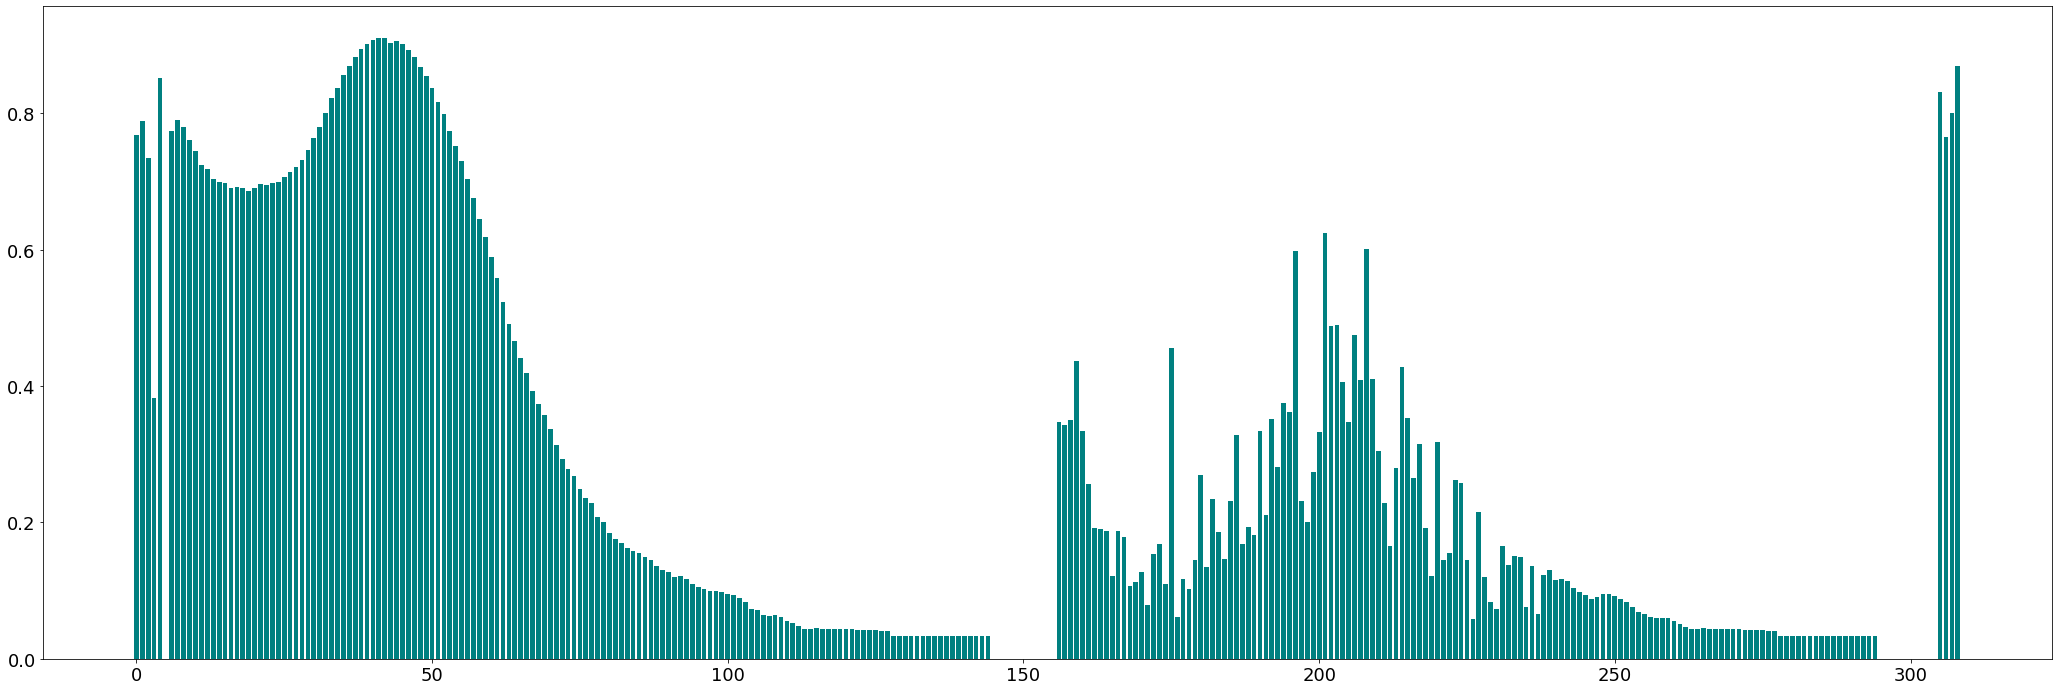

In [31]:
mean_abs_diff = np.sum(np.abs(X-np.mean(X, axis=0)), axis=0)/X.shape[0]
#mean_abs_diff = mean_abs_diff >= 0.5
plt.figure(figsize=(36,12))
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.bar(np.arange(X.shape[1]), mean_abs_diff, color='teal')

In [32]:
# Feature Extraction with PCA
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA
array = df_numeric
print(array.columns)
X = array.values
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
X = scaled_features
# feature extraction
pca = PCA()
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Index(['descarga', 'peso', 'media_fluxo_descarga', 'media_tempo_descarga',
       'periodo', 'fd_001', 'fd_002', 'fd_003', 'fd_004', 'fd_005',
       ...
       'td_145', 'td_146', 'td_147', 'td_148', 'td_149', 'td_150', 'status',
       'del', 'quantidade_iatf', 'dias_iatf'],
      dtype='object', length=309)
Explained Variance: [2.49990782e-01 1.29187519e-01 9.25111151e-02 6.05356916e-02
 4.68356223e-02 3.57635760e-02 2.30505343e-02 1.69467115e-02
 1.38819258e-02 1.18638684e-02 9.49047632e-03 8.72458187e-03
 7.74522227e-03 6.92160979e-03 6.38150772e-03 6.11312556e-03
 5.93040041e-03 5.88661696e-03 5.63093517e-03 5.49793545e-03
 5.29201921e-03 4.96271579e-03 4.86175767e-03 4.57056384e-03
 4.47547025e-03 4.34899249e-03 4.23111001e-03 4.17393530e-03
 4.07838849e-03 3.96953682e-03 3.88744940e-03 3.77066078e-03
 3.70731935e-03 3.62469101e-03 3.57057721e-03 3.52933113e-03
 3.52525933e-03 3.48226212e-03 3.46613401e-03 3.43691629e-03
 3.41307361e-03 3.37473527e-03 3.35419735e-03 3.33537272e-

In [33]:
df[df['peso'] == df['peso'].min()]

,numero,baia,sequencia,descarga,data,peso,media_fluxo_descarga,media_tempo_descarga,periodo,fd_001,...,td_147,td_148,td_149,td_150,tipo,ultimo_parto,status,del,quantidade_iatf,dias_iatf
3304,1545,8,10,46,2022-01-23 06:00:00,0.37,44.738103,19.951978,1,0,...,0,0,0,0,NaN,07/04/2021,1,291,3,10


In [34]:
df[df['peso'] == df['peso'].max()]

,numero,baia,sequencia,descarga,data,peso,media_fluxo_descarga,media_tempo_descarga,periodo,fd_001,...,td_147,td_148,td_149,td_150,tipo,ultimo_parto,status,del,quantidade_iatf,dias_iatf
1558,1337,3,9,99,2022-01-20,28.07,45.091994,6.926283,0,0,...,0,0,0,0,NaN,22/07/2021,0,182,2,15


In [35]:
df[df['peso'] >= df['peso'].mean()].sort_values(by='peso')

,numero,baia,sequencia,descarga,data,peso,media_fluxo_descarga,media_tempo_descarga,periodo,fd_001,...,td_147,td_148,td_149,td_150,tipo,ultimo_parto,status,del,quantidade_iatf,dias_iatf
2524,1590,1,4,51,2022-01-22 00:00:00,12.01,56.184677,7.076843,0,0,...,0,0,0,0,NaN,03/09/2021,3,141,2,51
1740,1559,5,3,38,2022-01-20 06:00:00,12.01,67.705182,5.399974,1,0,...,0,0,0,0,NaN,24/05/2021,0,241,3,91
826,1458,11,13,40,2022-01-18 06:00:00,12.01,46.851414,8.147725,1,0,...,0,0,0,0,NaN,27/05/2021,0,236,2,131
155,1412,10,11,42,2022-01-17 00:00:00,12.01,57.641506,6.484857,0,0,...,0,0,0,0,NaN,18/06/2021,0,213,2,116
1770,1579,7,5,41,2022-01-20 06:00:00,12.02,51.809090,7.161098,1,0,...,0,0,0,0,NaN,04/05/2021,0,261,1,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,1337,3,10,86,2022-01-18 00:00:00,25.52,46.413613,7.021430,0,0,...,0,0,0,0,NaN,22/07/2021,0,180,2,13
2089,1321,5,18,55,2022-01-21 00:00:00,26.18,47.842725,12.095891,0,0,...,0,0,0,0,NaN,27/08/2021,0,147,0,0
3122,1321,6,20,22,2022-01-23 00:00:00,26.51,9.163324,204.152455,0,0,...,0,0,0,0,vacas bezerro,27/08/2021,0,149,0,0
1035,1337,2,10,101,2022-01-19 00:00:00,26.89,49.072256,6.536188,0,0,...,0,0,0,0,NaN,22/07/2021,0,181,2,14


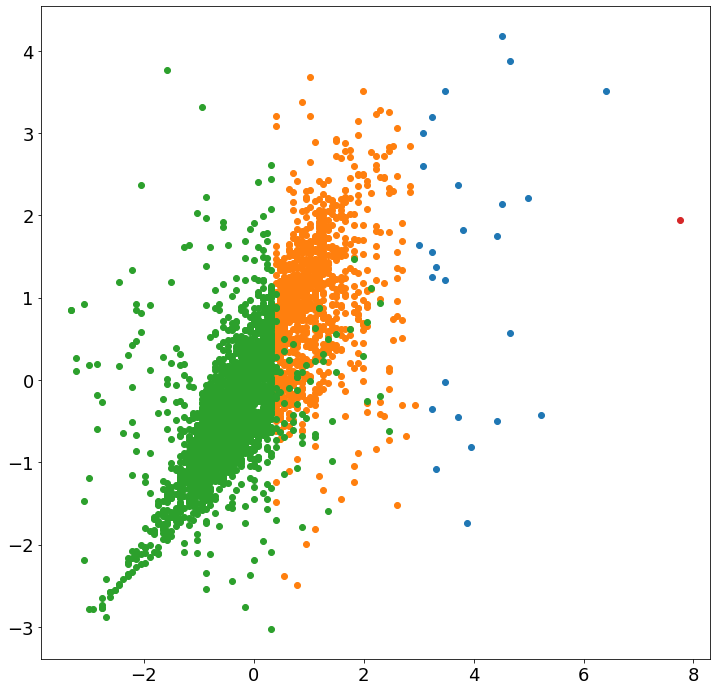

In [40]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define the model
model = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
plt.figure(figsize=(12,12))
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


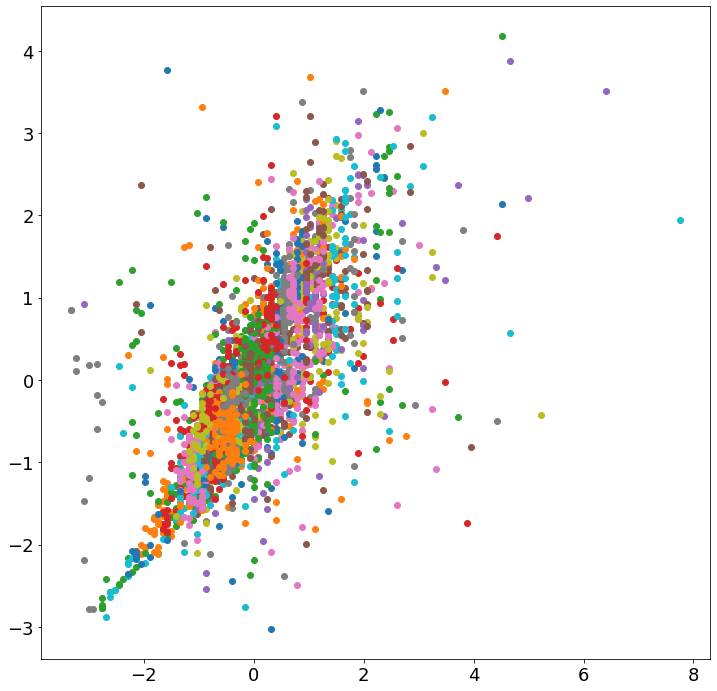

In [37]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot

model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
plt.figure(figsize=(12,12))
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

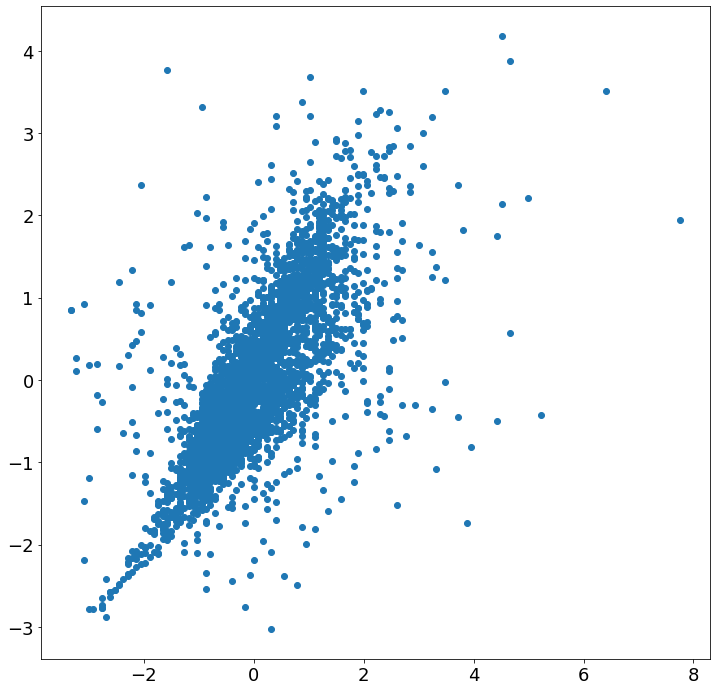

In [38]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define the model
model = DBSCAN(eps=0.30, min_samples=4)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
plt.figure(figsize=(12,12))
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

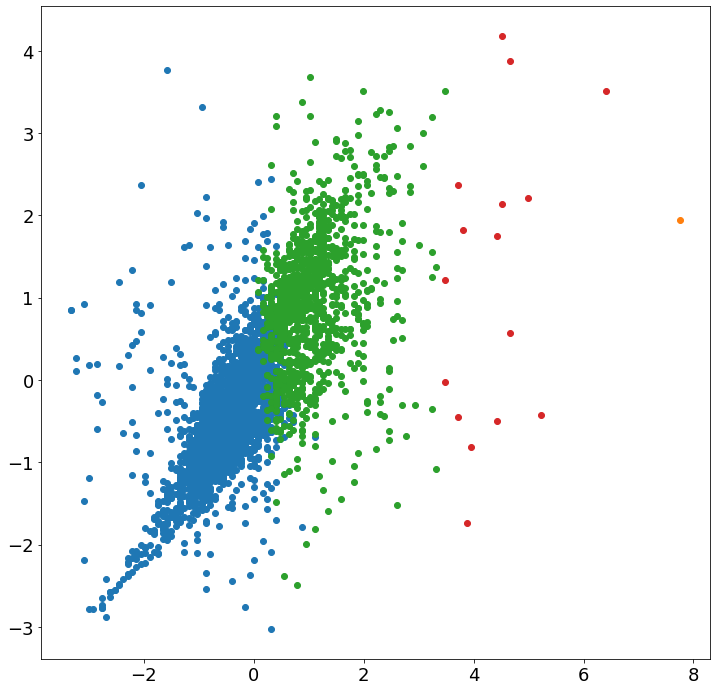

In [41]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define the model
model = KMeans(n_clusters=4)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
plt.figure(figsize=(12,12))
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()